## Problem Statement
Our client is the Centers for Disease Control and Prevention (CDC) who are working with the city of Chicago to reduce the number of patients whom are affected by the West Nile Virus. 

Our primary stakeholders will be the client (CDC) and the secondary stakeholders will be the government of Chicago. The given dataset consist of the following data:

- Main dataset where public health workers in Chicao set up mosquito traps across the city to test for the presence of West Nile virus. 
- Spray data which records the details of their spraying such as location and date in order to reduce the number of mosquitoes in the area. 
- Weather Data which records the condition of the city. It is believed that hot and dry conditions are more favourable for West Nile virus as compared to cold and wet. 
- Map from openstreet map 

The following is the general workflow for this project: 
+ **Data Cleaning**
+ **Exploratory Data Analysis (EDA)**
+ **Pre-processing and Feature Engineering**
+ **Modelling and Evaluation**
+ **Cost Benefit Analysis**
+ **Conclusion and Recommendation**

Due to imbalance data, test accuracy score will not be the main evaluation metric to select between the Random Forest Classifier and Logistic Regression models. Instead, the models will be evaluated using ROC AUC score and F1-score as the primary evaluation metrics. 

Considering the above, the Random Forest Classifier perform better as compared to the Logistic Regression Model. The Random Forest Classifier perform better as compared to the Logistic Regression model. The f1-score is 0.257 as compared to 0.172 for the Logistic Regression Model. The test ROC AUC scores are also better than the scores of the Logistic Regression. Therefore, the Random Forest Classifier will be selected as the final model to predict the unseen test data. More details will be covered in the Section - Modelling and Evaluation.

Based on the model results and cost benefit analysis, we will be proposing several recommendations to further reduce WNV infection rate -

- Target Clusters
- Intensify spraying in June and July
- Concurrent campaigns targeted at mosquito breeding and transmission prevention best practices

### Data Cleaning

In this notebook, we have read in 4 datasets - train, test, weather and spray data. The following data cleaning processes were performed -

- Converting the column names into lowercase
- Checking for missing data in the 4 datasets. We found that there are no missing data in the train and test data. For the spray data, there are a total of 584 missing values for the Time column but we have decided to drop the column in our modelling mainly because of the large number of missing values and also there are no other time columns in the other dataset. For the weather data, there are quite a number of missing values as indicated as M, -. In general, we drop missing values but after after defining features (before modelling), we identify several missing values and hence we use SimpleImputer to impute the missing value with the mean value from the train data.
- Checking of the trap addresses in the train data set shows that there are 2 traps addresses which are probably mislabelled or a typo error. However, the addresses are not crucial as coordinates (longitude and latitude) are provide. In our model, we drop the addresses.
- in the train data, the test results are organized in a way that the number of mosquitoes are capped at 50 for each record even when the samples are collected on the same day. We will combine these records into a single record to eliminate duplicates.
- Converting the datatypes to the appropriate dtypes - Example: values in the date columns for all data are convereted to datetime format

### Exploratory Data Analysis (EDA)

We have done an in-depth EDA for this project as shown below -

- Imbalance data in train data with 95% of the train data with no WNV present, while only 5% with WNV present.
- Train data consists of data associated with each mosquito trap  deployed across the city of Chicago. The location of the traps are described by the block number and street name which have been conveniently mapped into Latitude and Longitude. The trap data was collected among years: 2007, 2009, 2011 & 2013.
- Mosquito species - Both train and test data has the same top 3 species mosquitos: CULEX PIPIENS/RESTUANS, CULEX RESTUANS and CULEX PIPIENS.
However, there is an additional group of species - UNSPECIFIED CULEX in the test data. Considering the train data, these top 3 species of mosquitos are only detected with WNV present
- There are 136 traps in the train data and trap no. T900(at Ohare airport) has the most sampled data.
- Overall, the rates of the West Nile Virus appearing in the samples taken were the highest in 2007 and 2013, and these were also the years with the highest number of samples taken in total.
- It was observed that there were more mosquitoes in the summer (Jul to August). With the higher number of mosquitoes, the number of wnvpresent is also higher.
- We can see definitive seasonality trends for the occurrence of the WNV in mosquito samples, where August tends to have the highest rates of the virus occurring. The rates were highest in 2007 and 2013.
- Visualisation using the map of Chicago to visualise the weather stations, location of traps placed for catching mosquitoes, WNV outbreak shows that the traps are pretty spread out and the spray generally didnt cover most of the WNV outbreak areas
- Looking at the average Wetbulb Temperature over the years and the number of mosquitos captured, there is more mosquitoes in high temperature and high humidity. High amount of mosquitoes increase the probability

### Pre-processing and Feature Engineering

- Merging the data from Weather data to train and test data to consolidate all the data into one dataframe
- Created additional features of the difference between heat and cool columns as heat_cool, difference between tmax and tmin as trange, average temperature as tavg
- Created a correlation plot of the features in train dataframe with the weather data and manually drop the following features with provided reasons -
	- Drop tmax and tmin as we created new features tavg and trange using tmax and tmin
	- Drop heat and cool as they are used to create new feature heat_cool
	- Drop dewpoint, wetbulb, heat_cool as they are correlated with tavg
	- Drop sunrise, sunset as they are correlated to month
	- Drop avg speed as resultspeed and avgspeed are correlated.
	- Drop sealevel as sealevel and stnpressure are correlated. So dropped sealevel
	- Drop codesum an preciptotal as more than half the rows have the same value for codesum and preciptotal.
- Combining train and test data (with weather data) after ensuring the number of columns are identical. After which, use pd.getdummies to create dummy variables for the feature species
- Separate the combined into train and test data again.
- Use SimpleImputer to impute the missing value with the mean value from the train data after features are selected and completion of dummy variable for species.
- Use train_test_split with test_size = 0.3 to split the train data to train the models and this 30% test data will be to select the best model for predicting the final unseen test data.
- Use the argument "class_weight' for both models and set it to 'balanced' to treat data imbalance.

### Modelling and Evaluation
- Due to the imbalance data, ROC AUC score and F1 score were chosen as the model evaluation metrics. Cost-sensitive learning was used for this imbalanced classification.

- There will be 2 classification models created to predict the presence of West Nile Virus- Logistic Regression and Random Forest Classifier Models and the results of the model will be evaluated considering the above to select the final model for predicting the unseen test data.

**Results Summary**

|Score|Logisitic Regression|Random Forest Classifier|
|---|---|---|
|Train ROC AUC score | 0.725| 0.876|
|Test ROC AUC score | 0.736 | 0.852|
|Train F1 score | 0.164 | 0.269|
|Test F1 score | 0.172 | 0.257|

- Considering the above, the Random Forest Classifier perform better as compared to the Logistic Regression Model. 
- The f1-score for the Random Forest Classifier is 0.257 as compared to 0.172 for the Logistic Regression Model. The test ROC AUC scores are also better than the scores of the Logistic Regression. 
- Random Forest Classifier will be selected as the final model to predict the unseen test data
- Feature Importance shows that month and temperature average are the 2 most importance features
- Fitting the final model onto the entire training data and then predict the unseen test data
- Compile the unseen test data predictions into the kaggle format for submission to kaggle to obtain the score.

### Cost Benefit Analysis

The estimated cost of pesticide spraying required to cover the area of Chicago (approx. 150,000 acres) is USD138,000. Using a recent article in 2020, the estimated medical care and productivity (loss) cost incurred would amount to USD 197,000. Based on the CBA, the benefits of pesticide spraying outweighs the cost of pesticide spraying.  In summary, it is more economical to spray the whole city with pesticides in order to prevent any potential west nile virus outbreak. Benefits from mosquito spraying would include increased quality of life from fewer people falling sick and fatalities, increased workplace productivity by reducing the number of people falling sick, as well as savings in hospital expenses from treating WNV patients.

### Conclusion and Recommendation

**Improving Model Results**

Improvements which we can make to improve our results include the following -

1. To collect more data to have a more balance dataset
2. Utilize other more sophisticated models such as deep learning, XGBoost to see the results can improve further

**Solutions to reduce WNV infection rate**

In conclusion, spraying has not proven to be significant in reducing infection rates as we observed that WNV infections in mosquitoes actually rose in 2011 and 2013 when pesticide spraying was carried out. However, we believed that more data and more campaigns are required to optimise its impact before entirely ruling out pesticide spraying to reduce WNV infection rate. To further reduce WNV infection rate, we proposed 3 recommendations -

1) Target Clusters
2) Intensify spraying in June and July
3) Concurrent campaigns targeted at mosquito breeding and transmission prevention best practices

# Part 1: Data Cleaning 

In this notebook, mainly We have performed Data Cleaning all the datasets:
- train data
- test data
- weather data
- spray data

Data Cleaning including: check and handle missing values, check and remove duplicated values, convert inproper data types. 

## 1.1 Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime, timezone, timedelta
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from geopy.distance import geodesic
import geopy
import datetime as dt

import folium
from branca.element import Figure
from folium.plugins import MarkerCluster
from sklearn.neighbors import KernelDensity

from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score,roc_auc_score,f1_score,precision_score,recall_score, plot_roc_curve, plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_style("darkgrid")
sns.set_palette("viridis")

## 1.2 Load Data

In [2]:
data_path = "assets/"

train = pd.read_csv(data_path + "train.csv")
weather = pd.read_csv(data_path + "weather.csv")
spray = pd.read_csv(data_path + "spray.csv")
test = pd.read_csv(data_path + "test.csv")

## 1.3 Data Cleaning

### 1.3.1 Train & Test Data Inspection & Cleaning

In [3]:
train.shape

(10506, 12)

In [4]:
test.shape

(116293, 11)

In [5]:
train.head(3)

Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0

In [6]:
test.head(3)

Id        Date                                            Address  \
0   1  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2   3  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2           CULEX PIPIENS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
2  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9

In [7]:
# converting the column names into lowercase
train.columns=train.columns.map(lambda x:x.lower())
test.columns=test.columns.map(lambda x:x.lower())

In [8]:
# checking if column names are lowercase
train.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent'],
      dtype='object')

In [9]:
# checking if column names are lowercase
test.columns

Index(['id', 'date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy'],
      dtype='object')

#### Comments:
- These 2 columns are missing in test data- "nummosquitos" and "wnvpresent". "wnvpresent column is the target variable. To remove"nummosquitos" as a feature in the modelling.
- We need to solve the problem by modeling: classification model for prediction for wnvpresent.

In [10]:
# check Trap in train data
train_traps=train.trap.unique()
print(train_traps)
print(len(train_traps))

['T002' 'T007' 'T015' 'T045' 'T046' 'T048' 'T049' 'T050' 'T054' 'T086'
 'T091' 'T094' 'T096' 'T129' 'T143' 'T148' 'T153' 'T159' 'T009' 'T011'
 'T016' 'T019' 'T025' 'T028' 'T031' 'T033' 'T089' 'T090' 'T092' 'T135'
 'T141' 'T142' 'T145' 'T146' 'T147' 'T149' 'T150' 'T151' 'T152' 'T154'
 'T158' 'T162' 'T218' 'T220' 'T001' 'T003' 'T006' 'T008' 'T012' 'T034'
 'T037' 'T040' 'T043' 'T047' 'T051' 'T085' 'T088' 'T161' 'T219' 'T013'
 'T014' 'T018' 'T030' 'T084' 'T144' 'T160' 'T005' 'T017' 'T044' 'T095'
 'T004' 'T035' 'T036' 'T039' 'T060' 'T061' 'T062' 'T065' 'T066' 'T067'
 'T069' 'T070' 'T071' 'T073' 'T074' 'T075' 'T076' 'T077' 'T079' 'T080'
 'T081' 'T082' 'T083' 'T114' 'T155' 'T063' 'T115' 'T138' 'T200' 'T206'
 'T209' 'T212' 'T215' 'T107' 'T128' 'T072' 'T078' 'T097' 'T099' 'T100'
 'T102' 'T103' 'T027' 'T156' 'T157' 'T221' 'T900' 'T903' 'T222' 'T223'
 'T225' 'T227' 'T224' 'T226' 'T229' 'T230' 'T228' 'T232' 'T231' 'T235'
 'T233' 'T236' 'T237' 'T238' 'T094B' 'T054C']
136


In [11]:
# check Trap in train data
test_traps=test.trap.unique()
print(test_traps)
print(len(test_traps))

['T002' 'T007' 'T015' 'T045' 'T046' 'T048' 'T049' 'T050' 'T054' 'T086'
 'T091' 'T094' 'T096' 'T129' 'T143' 'T148' 'T153' 'T159' 'T009' 'T011'
 'T016' 'T019' 'T025' 'T028' 'T031' 'T033' 'T089' 'T090' 'T092' 'T135'
 'T141' 'T142' 'T145' 'T146' 'T147' 'T149' 'T150' 'T151' 'T152' 'T154'
 'T158' 'T162' 'T218' 'T220' 'T001' 'T003' 'T006' 'T008' 'T012' 'T034'
 'T037' 'T040' 'T043' 'T047' 'T051' 'T085' 'T088' 'T161' 'T219' 'T013'
 'T014' 'T018' 'T030' 'T084' 'T144' 'T160' 'T005' 'T017' 'T044' 'T095'
 'T004' 'T035' 'T036' 'T039' 'T060' 'T061' 'T062' 'T065' 'T066' 'T067'
 'T069' 'T070' 'T071' 'T073' 'T074' 'T075' 'T076' 'T077' 'T079' 'T080'
 'T081' 'T082' 'T083' 'T114' 'T155' 'T063' 'T115' 'T138' 'T200' 'T206'
 'T209' 'T212' 'T215' 'T107' 'T128' 'T072' 'T078' 'T097' 'T099' 'T100'
 'T102' 'T103' 'T027' 'T156' 'T157' 'T221' 'T900' 'T903' 'T090A' 'T090B'
 'T090C' 'T200A' 'T128A' 'T200B' 'T218A' 'T218C' 'T218B' 'T222' 'T223'
 'T225' 'T227' 'T224' 'T226' 'T229' 'T230' 'T228' 'T231' 'T232' 'T002A'
 'T

#### Comments:
- There are 136 unique traps in train data, while there are more traps in test data (149 traps).
- We will explore in the EDA stage and determinte if traps will be used as a feature in the modelling

In [12]:
# check for the Species of Mosquitoes in train data
train['species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: species, dtype: int64

In [13]:
# check for the Species of Mosquitoes in test data
test['species'].value_counts()

CULEX PIPIENS/RESTUANS    15359
CULEX RESTUANS            14670
CULEX PIPIENS             14521
CULEX SALINARIUS          14355
CULEX TERRITANS           14351
CULEX TARSALIS            14347
UNSPECIFIED CULEX         14345
CULEX ERRATICUS           14345
Name: species, dtype: int64

#### Comments:
- Both train and test data has the same top 3 species mosquitos: CULEX PIPIENS/RESTUANS, CULEX RESTUANS and CULEX PIPIENS.
- In the test data, there is an additional group of species - UNSPECIFIED CULEX.

In [14]:
# check for missing data in train data
train.isnull().sum()

date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
nummosquitos              0
wnvpresent                0
dtype: int64

#### Comments: 
- No missing data noted in train data.

In [15]:
train.describe()

block      latitude     longitude  addressaccuracy  \
count  10506.000000  10506.000000  10506.000000     10506.000000   
mean      35.687797     41.841139    -87.699908         7.819532   
std       24.339468      0.112742      0.096514         1.452921   
min       10.000000     41.644612    -87.930995         3.000000   
25%       12.000000     41.732984    -87.760070         8.000000   
50%       33.000000     41.846283    -87.694991         8.000000   
75%       52.000000     41.954690    -87.627796         9.000000   
max       98.000000     42.017430    -87.531635         9.000000   

       nummosquitos    wnvpresent  
count  10506.000000  10506.000000  
mean      12.853512      0.052446  
std       16.133816      0.222936  
min        1.000000      0.000000  
25%        2.000000      0.000000  
50%        5.000000      0.000000  
75%       17.000000      0.000000  
max       50.000000      1.000000

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    10506 non-null  object 
 1   address                 10506 non-null  object 
 2   species                 10506 non-null  object 
 3   block                   10506 non-null  int64  
 4   street                  10506 non-null  object 
 5   trap                    10506 non-null  object 
 6   addressnumberandstreet  10506 non-null  object 
 7   latitude                10506 non-null  float64
 8   longitude               10506 non-null  float64
 9   addressaccuracy         10506 non-null  int64  
 10  nummosquitos            10506 non-null  int64  
 11  wnvpresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      116293 non-null  int64  
 1   date                    116293 non-null  object 
 2   address                 116293 non-null  object 
 3   species                 116293 non-null  object 
 4   block                   116293 non-null  int64  
 5   street                  116293 non-null  object 
 6   trap                    116293 non-null  object 
 7   addressnumberandstreet  116293 non-null  object 
 8   latitude                116293 non-null  float64
 9   longitude               116293 non-null  float64
 10  addressaccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


In [18]:
# convert the values in date columns in both train and test data to datetime
train["date"] = pd.to_datetime(train["date"], format='%Y-%m-%d')
test["date"] = pd.to_datetime(test["date"], format='%Y-%m-%d')

In [19]:
# check the dtype of train dataset 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    10506 non-null  datetime64[ns]
 1   address                 10506 non-null  object        
 2   species                 10506 non-null  object        
 3   block                   10506 non-null  int64         
 4   street                  10506 non-null  object        
 5   trap                    10506 non-null  object        
 6   addressnumberandstreet  10506 non-null  object        
 7   latitude                10506 non-null  float64       
 8   longitude               10506 non-null  float64       
 9   addressaccuracy         10506 non-null  int64         
 10  nummosquitos            10506 non-null  int64         
 11  wnvpresent              10506 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), ob

#### Traps Address check

In [20]:
trap_add = train[['trap','address']].groupby(by='trap').agg({'address':pd.Series.nunique})
trap_add[trap_add['address'] >1]

address
trap         
T009        2
T035        2

In [21]:
train[train['trap']=='T009'].address.value_counts()

9100 West Higgins Road, Rosemont, IL 60018, USA     80
9100 West Higgins Avenue, Chicago, IL 60656, USA    31
Name: address, dtype: int64

In [22]:

train[train['trap']=='T035'].address.value_counts()

5100 West 72nd Street, Chicago, IL 60638, USA      45
3000 South Hoyne Avenue, Chicago, IL 60608, USA    27
Name: address, dtype: int64

#### Comments:
- T035 is probably mislabelled for one of the addresses and T009 is probably a typo.
- Since coordinates are already present, trap numbers aren't important.

#### Combine mosquito counts
As the test results are organized in a way that the number of mosquitoes are capped at 50 for each record even when the samples are collected on the same day. We will combine these records into a single record.

In [23]:
train.shape

(10506, 12)

In [24]:
train= train.groupby([col for col in train.columns if col not in ['nummosquitos', \
                                                                'wnvpresent']]).sum()
train.reset_index(inplace=True)
train['wnvpresent'] = train['wnvpresent'].map(lambda x : 1 if x > 0 else x)

train.head(2)

date                                      address  \
0 2007-05-29  1100 Roosevelt Road, Chicago, IL 60608, USA   
1 2007-05-29  1100 Roosevelt Road, Chicago, IL 60608, USA   

                  species  block        street  trap  \
0  CULEX PIPIENS/RESTUANS     11   W ROOSEVELT  T048   
1          CULEX RESTUANS     11   W ROOSEVELT  T048   

           addressnumberandstreet   latitude  longitude  addressaccuracy  \
0  1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224                8   
1  1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224                8   

   nummosquitos  wnvpresent  
0             1           0  
1             2           0

In [25]:
# split the date column into  year, month and day
train['year']=train.date.dt.year
train['month']=train.date.dt.month
train['day']=train.date.dt.day

test['year']=test.date.dt.year
test['month']=test.date.dt.month
test['day']=test.date.dt.day

In [26]:
train.head(2)

date                                      address  \
0 2007-05-29  1100 Roosevelt Road, Chicago, IL 60608, USA   
1 2007-05-29  1100 Roosevelt Road, Chicago, IL 60608, USA   

                  species  block        street  trap  \
0  CULEX PIPIENS/RESTUANS     11   W ROOSEVELT  T048   
1          CULEX RESTUANS     11   W ROOSEVELT  T048   

           addressnumberandstreet   latitude  longitude  addressaccuracy  \
0  1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224                8   
1  1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224                8   

   nummosquitos  wnvpresent  year  month  day  
0             1           0  2007      5   29  
1             2           0  2007      5   29

In [27]:
train.shape

(8475, 15)

In [28]:
test.shape

(116293, 14)

### 1.3.2 Spray Data Inspection & Cleaning

In [29]:
spray.head(3)

Date        Time   Latitude  Longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163
1  2011-08-29  6:57:08 PM  42.391348 -88.089163
2  2011-08-29  6:57:18 PM  42.391022 -88.089157

In [30]:
#convert column names into lowercase
spray.columns=spray.columns.map(lambda x:x.lower())

In [31]:
spray.describe().T

count       mean       std        min        25%        50%  \
latitude   14835.0  41.904828  0.104381  41.713925  41.785001  41.940075   
longitude  14835.0 -87.736690  0.067292 -88.096468 -87.794225 -87.727853   

                 75%        max  
latitude   41.980978  42.395983  
longitude -87.694108 -87.586727

In [32]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       14835 non-null  object 
 1   time       14251 non-null  object 
 2   latitude   14835 non-null  float64
 3   longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [33]:
# convert date in spray data to datetime
spray["date"] = pd.to_datetime(spray["date"],format='%Y-%m-%d')

In [34]:
#check for missing values in spray data
spray.isnull().sum()

date           0
time         584
latitude       0
longitude      0
dtype: int64

#### Comments:
There are 584 rows with missing 'time' value and as we have no clue to determine the true value, suggest to drop this column. Also, there are no time values in train and test data.

In [35]:
# drop "time" column from Spray data
spray.drop("time", axis=1, inplace=True)

In [36]:
spray.head()

date   latitude  longitude
0 2011-08-29  42.391623 -88.089163
1 2011-08-29  42.391348 -88.089163
2 2011-08-29  42.391022 -88.089157
3 2011-08-29  42.390637 -88.089158
4 2011-08-29  42.390410 -88.088858

In [37]:
spray.shape

(14835, 3)

In [38]:
# check duplicates
spray[spray.duplicated()==True]

date   latitude  longitude
485  2011-09-07  41.983917 -87.793088
490  2011-09-07  41.986460 -87.794225
491  2011-09-07  41.986460 -87.794225
492  2011-09-07  41.986460 -87.794225
493  2011-09-07  41.986460 -87.794225
...         ...        ...        ...
1025 2011-09-07  41.986460 -87.794225
1026 2011-09-07  41.986460 -87.794225
1027 2011-09-07  41.986460 -87.794225
1028 2011-09-07  41.986460 -87.794225
1029 2011-09-07  41.986460 -87.794225

[541 rows x 3 columns]

In [39]:
# there are 541 duplicated rows and We will remove them 
spray.drop_duplicates(keep='last', inplace = True)

In [40]:
spray.shape

(14294, 3)

#### Comments:
After removing duplicates, there are 14294 records for spray data.

In [41]:
spray.head(2)

date   latitude  longitude
0 2011-08-29  42.391623 -88.089163
1 2011-08-29  42.391348 -88.089163

In [42]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14294 entries, 0 to 14834
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       14294 non-null  datetime64[ns]
 1   latitude   14294 non-null  float64       
 2   longitude  14294 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 446.7 KB


In [43]:
train.date.dt.year.value_counts()

2007    2775
2013    2012
2009    1915
2011    1773
Name: date, dtype: int64

In [44]:
test.date.dt.year.value_counts()

2010    36557
2008    30498
2012    27115
2014    22123
Name: date, dtype: int64

In [45]:
spray.date.dt.year.value_counts()

2013    12626
2011     1668
Name: date, dtype: int64

#### Comments:
- Spray data has only year 2011 & 2013 data and only spray for 2 years records in train data.

In [46]:
# split the date column into  year, month and day
spray['year']=spray.date.dt.year
spray['month']=spray.date.dt.month
spray['day']=spray.date.dt.day

### 1.3.3 Weather Data Inspection & Cleaning

In [47]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [48]:
weather.columns=weather.columns.map(lambda x:x.lower())

In [49]:
# convert to datetime
weather["date"] = pd.to_datetime(weather["date"], format='%Y-%m-%d')

In [50]:
# split the date column into  year, month and day
weather['year']=weather.date.dt.year
weather['month']=weather.date.dt.month
weather['day']=weather.date.dt.day

In [51]:
weather.groupby(['year','month'])['date'].count()

year  month
2007  5        62
      6        60
      7        62
      8        62
      9        60
      10       62
2008  5        62
      6        60
      7        62
      8        62
      9        60
      10       62
2009  5        62
      6        60
      7        62
      8        62
      9        60
      10       62
2010  5        62
      6        60
      7        62
      8        62
      9        60
      10       62
2011  5        62
      6        60
      7        62
      8        62
      9        60
      10       62
2012  5        62
      6        60
      7        62
      8        62
      9        60
      10       62
2013  5        62
      6        60
      7        62
      8        62
      9        60
      10       62
2014  5        62
      6        60
      7        62
      8        62
      9        60
      10       62
Name: date, dtype: int64

#### Comments:
It looks like there are two readings per day for every day from May to October, from 2007 to 2014, one from each station.

In [52]:
weather.shape

(2944, 25)

In [53]:
weather.columns

Index(['station', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'depth',
       'water1', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', 'year', 'month', 'day'],
      dtype='object')

In [54]:
weather.describe()

station         tmax         tmin     dewpoint  resultspeed  \
count  2944.000000  2944.000000  2944.000000  2944.000000  2944.000000   
mean      1.500000    76.166101    57.810462    53.457880     6.960666   
std       0.500085    11.461970    10.381939    10.675181     3.587527   
min       1.000000    41.000000    29.000000    22.000000     0.100000   
25%       1.000000    69.000000    50.000000    46.000000     4.300000   
50%       1.500000    78.000000    59.000000    54.000000     6.400000   
75%       2.000000    85.000000    66.000000    62.000000     9.200000   
max       2.000000   104.000000    83.000000    75.000000    24.100000   

         resultdir         year        month          day  
count  2944.000000  2944.000000  2944.000000  2944.000000  
mean     17.494905  2010.500000     7.500000    15.836957  
std      10.063609     2.291677     1.710236     8.855731  
min       1.000000  2007.000000     5.000000     1.000000  
25%       7.000000  2008.750000     6.000000     8.000000  
50%      19.000000  2010.500000     7.500000    16.000000  
75%      25.000000  2012.250000     9.000000    23.250000  
max      36.000000  2014.000000    10.000000    31.000000

In [55]:
weather.isnull().sum()

station        0
date           0
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
codesum        0
depth          0
water1         0
snowfall       0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
year           0
month          0
day            0
dtype: int64

#### Comments:
Seems there are no missing values from above checking, but some numeric columns data type are not correct. We will do further inspections for those columns.

In [56]:
weather.station.value_counts()

2    1472
1    1472
Name: station, dtype: int64

In [57]:
weather.columns

Index(['station', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'depth',
       'water1', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', 'year', 'month', 'day'],
      dtype='object')

In [58]:
num_cols = weather.select_dtypes(object).columns

for i in num_cols:
    print(f"{i}:")
    print(weather[i].unique())
    print("***************")
    print('\n')

tavg:
['67' '68' '51' '52' '56' '58' 'M' '60' '59' '65' '70' '69' '71' '61' '55'
 '57' '73' '72' '53' '62' '63' '74' '75' '78' '76' '77' '66' '80' '64'
 '81' '82' '79' '85' '84' '83' '50' '49' '46' '48' '45' '54' '47' '44'
 '40' '41' '38' '39' '42' '37' '43' '86' '87' '89' '92' '88' '91' '93'
 '94' '90' '36']
***************


depart:
['14' 'M' '-3' ' 2' ' 4' ' 5' '10' '12' '13' '-2' '15' '11' '-4' '-6' ' 8'
 '-5' ' 1' ' 9' ' 6' '-9' '-8' ' 3' ' 0' '-1' '-7' ' 7' '-14' '18' '16'
 '22' '21' '20' '-10' '-16' '17' '-12' '-11' '-15' '-17' '19' '-13' '23']
***************


wetbulb:
['56' '57' '47' '48' '50' '49' '46' '54' '53' '62' '63' '60' '61' '51'
 '59' '58' '43' '44' '45' '65' '66' '67' '64' '52' '55' '69' '68' '70'
 '72' '71' '73' '74' '76' '42' '39' '40' '41' '35' '33' '34' 'M' '75' '36'
 '32' '38' '78' '77' '37']
***************


heat:
['0' '14' '13' '9' '7' 'M' '5' '6' '4' '10' '8' '12' '3' '2' '1' '15' '16'
 '19' '17' '20' '11' '18' '21' '25' '24' '27' '26' '23' '28' '22' '29']


In [59]:
weather.tavg.unique()

array(['67', '68', '51', '52', '56', '58', 'M', '60', '59', '65', '70',
       '69', '71', '61', '55', '57', '73', '72', '53', '62', '63', '74',
       '75', '78', '76', '77', '66', '80', '64', '81', '82', '79', '85',
       '84', '83', '50', '49', '46', '48', '45', '54', '47', '44', '40',
       '41', '38', '39', '42', '37', '43', '86', '87', '89', '92', '88',
       '91', '93', '94', '90', '36'], dtype=object)

#### Comments:
Missing values for tavg(average temperature) as M

In [60]:
weather[weather.tavg=='M']

station       date  tmax  tmin tavg depart  dewpoint wetbulb heat cool  \
7           2 2007-05-04    78    51    M      M        42      50    M    M   
505         2 2008-07-08    86    46    M      M        68      71    M    M   
675         2 2008-10-01    62    46    M      M        41      47    M    M   
1637        2 2011-07-22   100    71    M      M        70      74    M    M   
2067        2 2012-08-22    84    72    M      M        51      61    M    M   
2211        2 2013-05-02    71    42    M      M        39      45    M    M   
2501        2 2013-09-24    91    52    M      M        48      54    M    M   
2511        2 2013-09-29    84    53    M      M        48      54    M    M   
2525        2 2013-10-06    76    48    M      M        44      50    M    M   
2579        2 2014-05-02    80    47    M      M        43      47    M    M   
2811        2 2014-08-26    86    49    M      M        68      71    M    M   

      ... snowfall preciptotal stnpressure sealevel resultspeed resultdir  \
7     ...        M        0.00       29.36    30.04        10.1         7   
505   ...        M        0.28       29.16    29.80         7.4        24   
675   ...        M        0.00       29.30    29.96        10.9        33   
1637  ...        M        0.14       29.23    29.86         3.8        10   
2067  ...        M        0.00       29.39        M         4.7        19   
2211  ...        M        0.00       29.51    30.17        15.8         2   
2501  ...        M        0.00       29.33    30.00         5.8         9   
2511  ...        M        0.22       29.36    30.01         6.3        36   
2525  ...        M        0.06       29.10    29.76        10.1        25   
2579  ...        M        0.04       29.10    29.79        10.7        23   
2811  ...        M           T       29.41    30.04         1.3        15   

     avgspeed  year month  day  
7        10.4  2007     5    4  
505       8.3  2008     7    8  
675      11.0  2008    10    1  
1637      8.2  2011     7   22  
2067        M  2012     8   22  
2211     16.1  2013     5    2  
2501      7.7  2013     9   24  
2511      7.8  2013     9   29  
2525     10.6  2013    10    6  
2579     11.9  2014     5    2  
2811      5.8  2014     8   26  

[11 rows x 25 columns]

In [61]:
index = weather[weather.tavg=='M']
weather.drop(index.index, inplace= True)

In [62]:
# Fill in nulls for preciptotal
weather['preciptotal'] = weather['preciptotal'].fillna(0)

# Fill in nulls for t average
t_avg_nulls = weather.loc[weather['tavg'].isnull(),:][['tmax','tmin']].copy()
t_avg_series = (t_avg_nulls['tmax'] + t_avg_nulls['tmin'] / 2)
weather['tavg'] = weather['tavg'].fillna(t_avg_series)

weather['tavg'] = weather['tavg'].astype(float)

In [63]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2933 entries, 0 to 2943
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2933 non-null   int64         
 1   date         2933 non-null   datetime64[ns]
 2   tmax         2933 non-null   int64         
 3   tmin         2933 non-null   int64         
 4   tavg         2933 non-null   float64       
 5   depart       2933 non-null   object        
 6   dewpoint     2933 non-null   int64         
 7   wetbulb      2933 non-null   object        
 8   heat         2933 non-null   object        
 9   cool         2933 non-null   object        
 10  sunrise      2933 non-null   object        
 11  sunset       2933 non-null   object        
 12  codesum      2933 non-null   object        
 13  depth        2933 non-null   object        
 14  water1       2933 non-null   object        
 15  snowfall     2933 non-null   object        
 16  precip

#### Comments:
There are 11 rows with missing values also more columns like 'depart', 'heat', 'cool', 'depth' etc. Seems these columns have common data input issues, I will remove these 11 rows and do a check again.

In [64]:
weather.depth.value_counts()

0    1472
M    1461
Name: depth, dtype: int64

In [65]:
weather.drop('depth', axis=1, inplace=True)

#### Comments:
- The "depth" column has dropped as almost half of the values are missing and we don't have any clue to get its true value and not worth for data imputing.

In [66]:
weather.snowfall.value_counts()

M      1461
0.0    1459
  T      12
0.1       1
Name: snowfall, dtype: int64

In [67]:
weather.drop('snowfall', axis=1, inplace=True)

#### Comments:
- The "snowfall" column has dropped as almost half of the values are missing and we don't have any clue to get its true value and not worth for data imputing.
- As we are not likely to experience mosquitos in winter, the "snowfall" data column doesn't seem important to our analysis and modeling

In [68]:
weather.water1.value_counts()

M    2933
Name: water1, dtype: int64

In [69]:
weather.drop('water1', axis=1, inplace=True)

#### Comments:
- The "water1" column has dropped as all records are not correct data.

In [70]:
weather[weather.codesum=='M']

Empty DataFrame
Columns: [station, date, tmax, tmin, tavg, depart, dewpoint, wetbulb, heat, cool, sunrise, sunset, codesum, preciptotal, stnpressure, sealevel, resultspeed, resultdir, avgspeed, year, month, day]
Index: []

[0 rows x 22 columns]

In [71]:
weather.preciptotal.unique()

array(['0.00', '  T', '0.13', '0.02', '0.38', '0.60', '0.14', '0.07',
       '0.11', '0.09', '1.01', '0.28', '0.04', '0.08', '0.01', '0.53',
       '0.19', '0.21', '0.32', '0.39', '0.31', '0.42', '0.27', '0.16',
       '0.58', '0.93', '0.05', '0.34', '0.15', '0.35', 'M', '0.40',
       '0.66', '0.30', '0.24', '0.43', '1.55', '0.92', '0.89', '0.17',
       '0.03', '1.43', '0.97', '0.26', '1.31', '0.06', '0.46', '0.29',
       '0.23', '0.41', '0.45', '0.83', '1.33', '0.91', '0.48', '0.37',
       '0.88', '2.35', '1.96', '0.20', '0.25', '0.18', '0.67', '0.36',
       '0.33', '1.28', '0.74', '0.76', '0.71', '0.95', '1.46', '0.12',
       '0.52', '0.64', '0.22', '1.24', '0.72', '0.73', '0.65', '1.61',
       '1.22', '0.50', '1.05', '2.43', '0.59', '2.90', '2.68', '1.23',
       '0.62', '6.64', '3.07', '1.44', '1.75', '0.82', '0.80', '0.86',
       '0.63', '0.55', '1.03', '0.70', '1.73', '1.38', '0.44', '1.14',
       '1.07', '3.97', '0.87', '0.78', '1.12', '0.68', '0.10', '0.61',
       '0.

In [72]:
weather[(weather.preciptotal=='M')|(weather.preciptotal=='T')]

station       date  tmax  tmin  tavg depart  dewpoint wetbulb heat cool  \
117        2 2007-06-28    73    61  67.0      M        56      61    0    2   
119        2 2007-06-29    71    56  64.0      M        56      60    1    0   

     ... codesum preciptotal stnpressure sealevel resultspeed resultdir  \
117  ...                   M       29.43    30.07        12.2         2   
119  ...                   M       29.47    30.11         7.4         2   

     avgspeed  year month  day  
117      13.3  2007     6   28  
119       8.2  2007     6   29  

[2 rows x 22 columns]

In [73]:
weather.drop(117,inplace=True)

In [74]:
weather.drop(118,inplace=True)

#### Comments:
- Rows 117 & 118 are removed as they have 2 missing values for "preciptotal".

In [75]:
weather.stnpressure.unique()

array(['29.10', '29.18', '29.38', '29.44', '29.39', '29.46', '29.31',
       '29.40', '29.57', '29.62', '29.29', '29.36', '29.21', '29.28',
       '29.20', '29.26', '29.33', '29.49', '29.54', '29.55', '29.23',
       '29.13', '29.19', '29.53', '29.60', '29.34', '29.41', '29.47',
       '29.51', '29.42', '29.43', '29.25', '29.03', '28.82', '28.87',
       '28.88', '29.16', '29.07', '28.84', '28.91', '29.24', 'M', '29.30',
       '29.12', '29.45', '29.56', '29.32', '29.05', '29.11', '29.06',
       '29.22', '29.08', '29.14', '29.37', '29.35', '29.15', '29.17',
       '29.48', '29.52', '29.27', '29.50', '28.59', '28.67', '28.75',
       '29.02', '29.79', '29.86', '29.63', '29.70', '28.95', '29.01',
       '28.79', '28.85', '28.97', '28.89', '28.94', '28.93', '28.98',
       '28.96', '29.00', '29.66', '29.09', '28.90', '29.04', '29.59',
       '29.65', '29.58', '29.61', '29.64', '29.71', '29.67', '28.80',
       '28.73', '29.68', '28.74', '28.55', '28.63', '28.92', '28.99',
       '28.81',

In [76]:
weather[(weather.stnpressure=='M')]

station       date  tmax  tmin  tavg depart  dewpoint wetbulb heat cool  \
87          2 2007-06-13    86    68  77.0      M        53      62    0   12   
848         1 2009-06-26    86    69  78.0      7        60       M    0   13   
2410        1 2013-08-10    81    64  73.0      0        57       M    0    8   
2411        2 2013-08-10    81    68  75.0      M        55      63    0   10   

      ... codesum preciptotal stnpressure sealevel resultspeed resultdir  \
87    ...                0.00           M        M         7.0         5   
848   ...                0.00           M    29.85         6.4         4   
2410  ...                0.00           M    30.08         5.3         5   
2411  ...                0.00           M    30.07         6.0         6   

      avgspeed  year month  day  
87           M  2007     6   13  
848        8.2  2009     6   26  
2410       6.5  2013     8   10  
2411       7.4  2013     8   10  

[4 rows x 22 columns]

In [77]:
index_names=weather[(weather.stnpressure=='M')]
weather.drop(index_names.index, inplace= True)

#### Comments:
- 4 missing value rows for "stnpressure" have been removed.

In [78]:
weather.depart.unique()

array(['14', 'M', '-3', ' 2', ' 4', ' 5', '10', '12', '13', '-2', '15',
       '11', '-4', '-6', ' 8', '-5', ' 1', ' 9', ' 6', '-9', '-8', ' 3',
       ' 0', '-1', '-7', ' 7', '-14', '18', '16', '22', '21', '20', '-10',
       '-16', '17', '-12', '-11', '-15', '-17', '19', '-13', '23'],
      dtype=object)

In [79]:
weather[(weather.depart=='M')]

station       date  tmax  tmin  tavg depart  dewpoint wetbulb heat cool  \
1           2 2007-05-01    84    52  68.0      M        51      57    0    3   
3           2 2007-05-02    60    43  52.0      M        42      47   13    0   
5           2 2007-05-03    67    48  58.0      M        40      50    7    0   
9           2 2007-05-05    66    54  60.0      M        39      50    5    0   
11          2 2007-05-06    68    52  60.0      M        30      46    5    0   
...       ...        ...   ...   ...   ...    ...       ...     ...  ...  ...   
2935        2 2014-10-27    79    54  67.0      M        52      59    0    2   
2937        2 2014-10-28    66    48  57.0      M        40      48    8    0   
2939        2 2014-10-29    49    40  45.0      M        34      42   20    0   
2941        2 2014-10-30    53    37  45.0      M        35      42   20    0   
2943        2 2014-10-31    49    34  42.0      M        29      36   23    0   

      ...   codesum preciptotal stnpressure sealevel resultspeed resultdir  \
1     ...                  0.00       29.18    29.82         2.7        25   
3     ...     BR HZ        0.00       29.44    30.08        13.3         2   
5     ...        HZ        0.00       29.46    30.12        12.9         6   
9     ...                     T       29.46    30.09        11.2         7   
11    ...                  0.00       29.62    30.28        13.8        10   
...   ...       ...         ...         ...      ...         ...       ...   
2935  ...        RA        0.02       29.00    29.67        12.7        19   
2937  ...        RA        0.03       29.23    29.85        14.0        26   
2939  ...                  0.00       29.42    30.07         8.5        29   
2941  ...        RA           T       29.41    30.10         5.9        23   
2943  ...  RA SN BR        0.04       29.54    30.20        21.7        34   

      avgspeed  year month  day  
1          9.6  2007     5    1  
3         13.4  2007     5    2  
5         13.2  2007     5    3  
9         11.5  2007     5    5  
11        14.5  2007     5    6  
...        ...   ...   ...  ...  
2935      13.6  2014    10   27  
2937      14.6  2014    10   28  
2939       9.0  2014    10   29  
2941       6.5  2014    10   30  
2943      22.6  2014    10   31  

[1458 rows x 22 columns]

In [80]:
weather.drop('depart', axis=1, inplace=True)

#### Comments:
- As almost half of "depart" data are missing, suggest to remove this column.

In [81]:
weather.sealevel.unique()

array(['29.82', '30.09', '30.08', '30.12', '30.05', '30.10', '30.29',
       '30.28', '30.03', '30.02', '29.94', '29.93', '29.92', '29.91',
       '30.04', '30.20', '30.19', '30.24', '29.97', '29.98', '29.84',
       '29.83', '30.27', '30.25', '30.26', '30.11', '30.06', '30.23',
       '30.15', '30.14', '30.00', '29.99', '29.90', '29.77', '29.76',
       '29.56', '29.54', '29.52', '29.51', '29.79', '29.78', '29.81',
       '29.55', '29.85', '30.07', '30.16', '29.96', '29.95', '30.13',
       '30.21', '30.22', '29.88', '30.01', '29.80', '29.89', '29.74',
       '29.87', '29.86', '30.18', '30.17', '29.34', '29.44', '29.45',
       '29.71', '29.72', '30.52', '30.53', '30.40', '30.41', '29.67',
       '29.53', '29.69', '29.61', '29.64', '29.63', '29.66', '29.70',
       '30.34', '30.33', '29.62', '29.60', '29.75', '29.68', '29.73',
       '30.31', '30.30', '30.32', '30.37', '30.39', 'M', '29.59', '29.65',
       '30.35', '30.36', '29.48', '30.38', '29.50', '29.25', '29.23',
       '29.46',

In [82]:
weather[(weather.sealevel=='M')]

station       date  tmax  tmin  tavg  dewpoint wetbulb heat cool  \
832         1 2009-06-18    80    61  71.0        63      67    0    6   
994         1 2009-09-07    77    59  68.0        59      62    0    3   
1732        1 2011-09-08    75    57  66.0        53      59    0    1   
1745        2 2011-09-14    60    48  54.0        45      51   11    0   
1756        1 2011-09-20    74    49  62.0        54      58    3    0   
2090        1 2012-09-03    88    71  80.0        70      73    0   15   
2743        2 2014-07-23    76    64  70.0        56      61    0    5   

     sunrise  ...       codesum preciptotal stnpressure sealevel resultspeed  \
832     0416  ...         RA BR        0.12       29.08        M         6.7   
994     0523  ...            BR        0.00       29.39        M         5.8   
1732    0524  ...            RA           T       29.34        M        13.0   
1745       -  ...   RA BR HZ FU           T       29.47        M         6.0   
1756    0537  ...  MIFG BCFG BR        0.00       29.26        M         7.3   
2090    0519  ...            BR        0.00       29.17        M         4.6   
2743       -  ...                      0.00       29.47        M        16.4   

      resultdir  avgspeed  year  month  day  
832          16       7.9  2009      6   18  
994           3       4.0  2009      9    7  
1732          2      13.4  2011      9    8  
1745         32         M  2011      9   14  
1756         18       7.3  2011      9   20  
2090          6       4.4  2012      9    3  
2743          2      16.7  2014      7   23  

[7 rows x 21 columns]

In [83]:
index_names= weather[(weather.sealevel=='M')]
weather.drop(index_names.index, inplace= True)

#### Comments:
- There are 7 missing value rows for "sealevel" and suggest to remove these rows from weather data.

In [84]:
weather[(weather.avgspeed=='M')]

Empty DataFrame
Columns: [station, date, tmax, tmin, tavg, dewpoint, wetbulb, heat, cool, sunrise, sunset, codesum, preciptotal, stnpressure, sealevel, resultspeed, resultdir, avgspeed, year, month, day]
Index: []

[0 rows x 21 columns]

In [85]:
weather.wetbulb.unique()

array(['56', '57', '47', '48', '50', '49', '46', '54', '53', '62', '63',
       '60', '61', '51', '59', '58', '43', '44', '45', '65', '66', '67',
       '64', '52', '55', '69', '68', '70', '72', '71', '73', '74', '76',
       '42', '39', '40', '41', '35', '33', '34', '75', '36', '32', '38',
       '78', '77', '37', 'M'], dtype=object)

In [86]:
weather[(weather.wetbulb=='M')]

station       date  tmax  tmin  tavg  dewpoint wetbulb heat cool  \
2412        1 2013-08-11    81    60  71.0        61       M    0    6   
2415        2 2013-08-12    85    69  77.0        63       M    0   12   

     sunrise  ... codesum preciptotal stnpressure sealevel resultspeed  \
2412    0455  ...      RA        0.01       29.35    30.07         2.0   
2415       -  ...      RA        0.66       29.27    29.92         4.5   

      resultdir  avgspeed  year  month  day  
2412         27       3.0  2013      8   11  
2415         26       7.7  2013      8   12  

[2 rows x 21 columns]

In [87]:
index_names= weather[(weather.wetbulb=='M')]
weather.drop(index_names.index, inplace= True)

#### Comments:
- There are 2 missing value rows for "wetbulb" and suggest to remove these rows from weather data.

In [88]:
weather.reset_index(inplace=True)

In [89]:
weather.head()

index  station       date  tmax  tmin  tavg  dewpoint wetbulb heat cool  \
0      0        1 2007-05-01    83    50  67.0        51      56    0    2   
1      1        2 2007-05-01    84    52  68.0        51      57    0    3   
2      2        1 2007-05-02    59    42  51.0        42      47   14    0   
3      3        2 2007-05-02    60    43  52.0        42      47   13    0   
4      4        1 2007-05-03    66    46  56.0        40      48    9    0   

   ... codesum preciptotal stnpressure sealevel resultspeed resultdir  \
0  ...                0.00       29.10    29.82         1.7        27   
1  ...                0.00       29.18    29.82         2.7        25   
2  ...      BR        0.00       29.38    30.09        13.0         4   
3  ...   BR HZ        0.00       29.44    30.08        13.3         2   
4  ...                0.00       29.39    30.12        11.7         7   

   avgspeed  year month  day  
0       9.2  2007     5    1  
1       9.6  2007     5    1  
2      13.4  2007     5    2  
3      13.4  2007     5    2  
4      11.9  2007     5    3  

[5 rows x 22 columns]

In [90]:
# Create new feature for temp range
weather['trange'] = weather['tmax'] - weather['tmin']

In [91]:
weather.isna().sum().sort_values(ascending=False)/len(weather)

index          0.0
codesum        0.0
day            0.0
month          0.0
year           0.0
avgspeed       0.0
resultdir      0.0
resultspeed    0.0
sealevel       0.0
stnpressure    0.0
preciptotal    0.0
sunset         0.0
station        0.0
sunrise        0.0
cool           0.0
heat           0.0
wetbulb        0.0
dewpoint       0.0
tavg           0.0
tmin           0.0
tmax           0.0
date           0.0
trange         0.0
dtype: float64

#### Merge train / test with Weather-station data
- In order to find the nearest weather station, we can use the coordinates of the Chicago O'Hare International Airport (where station 1 is located) and the Chicago Midway International Airport (where station 2 is located):
 - Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
 - Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

In [92]:
# to see which weather monitoring station is close the the trap location
def nearest_station(lat, lon):
    station_1 = (41.995, -87.933)
    station_2 = (41.786, -87.752)
    stn1_dist = abs(geopy.distance.geodesic((lat,lon), station_1).km)
    stn2_dist = abs(geopy.distance.geodesic((lat,lon), station_2).km)
    return 1 if stn1_dist < stn2_dist else 2

In [93]:
train['nearest_station'] = [nearest_station(train.loc[i,'latitude'],train.loc[i,'longitude']) for i in train.index]
test['nearest_station'] = [nearest_station(test.loc[i,'latitude'],test.loc[i,'longitude']) for i in test.index]

In [94]:
train.head(2)

date                                      address  \
0 2007-05-29  1100 Roosevelt Road, Chicago, IL 60608, USA   
1 2007-05-29  1100 Roosevelt Road, Chicago, IL 60608, USA   

                  species  block        street  trap  \
0  CULEX PIPIENS/RESTUANS     11   W ROOSEVELT  T048   
1          CULEX RESTUANS     11   W ROOSEVELT  T048   

           addressnumberandstreet   latitude  longitude  addressaccuracy  \
0  1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224                8   
1  1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224                8   

   nummosquitos  wnvpresent  year  month  day  nearest_station  
0             1           0  2007      5   29                2  
1             2           0  2007      5   29                2

In [95]:
train['nearest_station'].value_counts(normalize= True)

2    0.709381
1    0.290619
Name: nearest_station, dtype: float64

In [96]:
test['nearest_station'].value_counts(normalize= True)

2    0.695588
1    0.304412
Name: nearest_station, dtype: float64

#### Comments:
- Both train & test data, more traps close to weather monitoring station 2. (CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level)

In [97]:
train.shape

(8475, 16)

In [98]:
test.shape

(116293, 15)

# Part 2: Exploratory Data Analysis

## 2.1 EDA on train trap data
This is the data associated with each mosquito trap deployed across the city of Chicago. The location of the traps are described by the block number and street name which have been conveniently mapped into Latitude and Longitude.

The trap data was collected among years: 2007, 2009, 2011 & 2013.

In [99]:
train["date"] = pd.to_datetime(train["date"], format='%Y-%m-%d')

In [100]:
train.date.dt.year.value_counts()

2007    2775
2013    2012
2009    1915
2011    1773
Name: date, dtype: int64

In [101]:
train.head(2)

date                                      address  \
0 2007-05-29  1100 Roosevelt Road, Chicago, IL 60608, USA   
1 2007-05-29  1100 Roosevelt Road, Chicago, IL 60608, USA   

                  species  block        street  trap  \
0  CULEX PIPIENS/RESTUANS     11   W ROOSEVELT  T048   
1          CULEX RESTUANS     11   W ROOSEVELT  T048   

           addressnumberandstreet   latitude  longitude  addressaccuracy  \
0  1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224                8   
1  1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224                8   

   nummosquitos  wnvpresent  year  month  day  nearest_station  
0             1           0  2007      5   29                2  
1             2           0  2007      5   29                2

In [102]:
train.shape

(8475, 16)

In [103]:
train.wnvpresent.value_counts(normalize=True)

0    0.946077
1    0.053923
Name: wnvpresent, dtype: float64

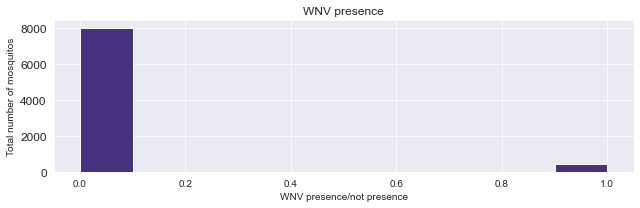

In [104]:
plt.figure(figsize=(9,3))
plt.hist(train.wnvpresent)
plt.title('WNV presence', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('WNV presence/not presence')
plt.ylabel('Total number of mosquitos')
plt.tight_layout()

#### Comments:
- We can see that about 95% train data with no WNV present, while only 5% with WNV present.
- It's a highly umbalanced dataset, when comes to model part We need to apply resampling on train data, for example, SMOTE provided by the imblanced-learned python library in the SMOTE class.

## 2.2 Mosquito species

In [105]:
# what species are there
print(f'number of species: {train["species"].nunique()}')
train["species"].value_counts(normalize=True)

number of species: 7


CULEX PIPIENS/RESTUANS    0.451445
CULEX RESTUANS            0.282360
CULEX PIPIENS             0.230088
CULEX TERRITANS           0.025487
CULEX SALINARIUS          0.009794
CULEX TARSALIS            0.000708
CULEX ERRATICUS           0.000118
Name: species, dtype: float64

Text(0.5, 1.0, 'total number of samples collected for each species')

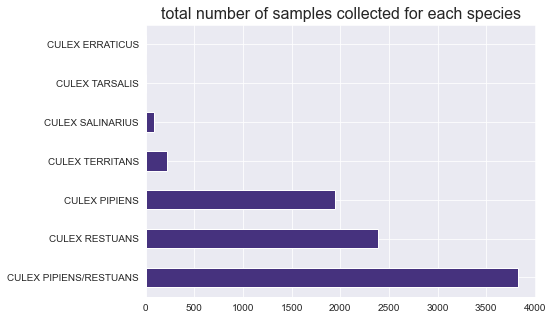

In [106]:
train['species'].value_counts().plot(kind='barh', figsize=(7,5))
plt.title('total number of samples collected for each species', fontsize=16)

                        nummosquitos  wnvpresent
species                                         
CULEX ERRATICUS                    7           0
CULEX PIPIENS                  44671         184
CULEX PIPIENS/RESTUANS         66268         225
CULEX RESTUANS                 23431          48
CULEX SALINARIUS                 145           0
CULEX TARSALIS                     7           0
CULEX TERRITANS                  510           0


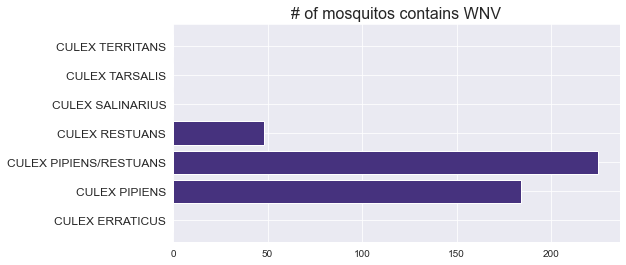

In [107]:
mos_present= train[["species","nummosquitos","wnvpresent"]].groupby(by="species").sum()
print(mos_present)
mos_present.reset_index(inplace=True)
plt.figure(figsize=(8,4))
plt.barh(mos_present.species, mos_present.wnvpresent)
plt.title("# of mosquitos contains WNV", fontsize =16)
plt.yticks(fontsize=12)
plt.show()

#### Comments:
- Top 3 species mosquitos are: CULEX PIPIENS/RESTUANS, CULEX RESTUANS and CULEX PIPIENS which made up more than 96% of the sample of the species sampled
- Theres top 3 species mosquitos are the only species been detected with WNV presents.

## 2.3 Traps check

In [108]:
train.trap.nunique()

136

In [109]:
train.trap.value_counts()

T900     154
T002     147
T135     147
T151     143
T115     143
        ... 
T078       6
T076       5
T094B      5
T237       3
T040       2
Name: trap, Length: 136, dtype: int64

     trap  wnvpresent
134  T900          29
1    T002          15
82   T115          15
2    T003          14
121  T225          11
9    T011          11
11   T013          10
86   T138           9
20   T028           9
81   T114           9


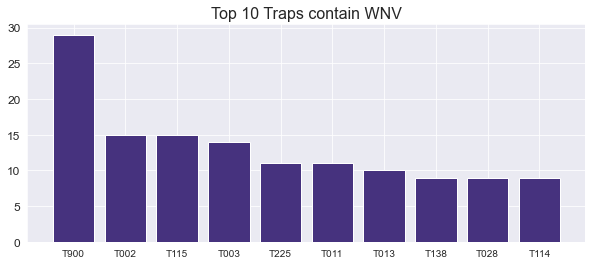

In [110]:
trap_present=train[['trap', 'wnvpresent']].groupby(by="trap").sum()
trap_present.reset_index(inplace=True)
trap_present.sort_values(by='wnvpresent', ascending=False, inplace=True)
trap_present=trap_present[:10]
print(trap_present)

plt.figure(figsize=(10,4))
plt.bar(trap_present.trap, trap_present.wnvpresent)
plt.title("Top 10 Traps contain WNV", fontsize =16)
plt.yticks(fontsize=12)
plt.show()

#### Comments:
- There are 136 traps in the train data and trap no. T900(at Ohare airport) has the most sampled data.
- The top 10 traps with WNV presence
 - T900 29
 - T002 15
 - T115 15
 - T003 14
 - T225 11
 - T011 11
 - T013 10
 - T138 9
 - T028 9
 - T114 9

There are the address, latitude & longitude for all traps in train data, we will see how to associate with Spray or Weather data to get more insights on the traps to understand whether there are any spray been done or monitoring locations made near the traps.

## 2.4 WNVPresent Correlation

<AxesSubplot:>

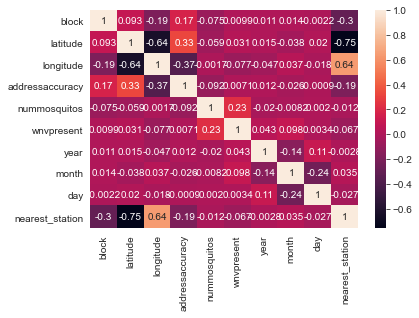

In [111]:
# To find out the correlation between variables in train dataset
sns.heatmap(train.corr(), annot=True)

In [112]:
# To find out the correlation between number of mosquitos and wnvpresent
train.corr()['wnvpresent'].sort_values(ascending=False)

wnvpresent         1.000000
nummosquitos       0.233532
month              0.097948
year               0.043038
latitude           0.030862
block              0.009859
addressaccuracy    0.007057
day                0.003400
nearest_station   -0.066947
longitude         -0.076732
Name: wnvpresent, dtype: float64

#### Comments:
- The top 3 important factors are year, month and number of mosquitoes to the WNV present.
- We will plot out the WNV present for these 3 factors to get a close look on their distribution and relationship.

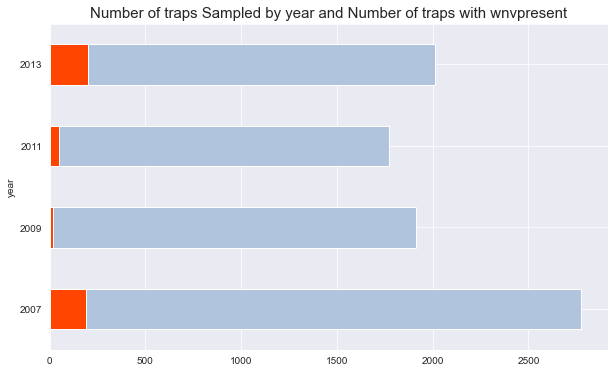

In [113]:
# Plot the number of traps taken each year and positive traps

plt.figure(figsize=(10,6))
train.groupby('year')['trap'].count().plot(kind='barh',color='lightsteelblue');
train.groupby('year')['wnvpresent'].sum().plot(kind='barh',color='orangered');
plt.title('Number of traps Sampled by year and Number of traps with wnvpresent',fontsize=15);

#### Comments:
- Overall, the rates of the West Nile Virus appearing in the samples taken were the highest in 2007 and 2013, and these were also the years with the highest number of samples taken in total.

In [114]:
# Number of rows per year
train.groupby(['year','month'])['trap'].count()

year  month
2007  5          25
      6         175
      7         457
      8        1266
      9         651
      10        201
2009  5          56
      6         469
      7         621
      8         325
      9         381
      10         63
2011  6         314
      7         529
      8         448
      9         482
2013  6         379
      7         489
      8         711
      9         433
Name: trap, dtype: int64

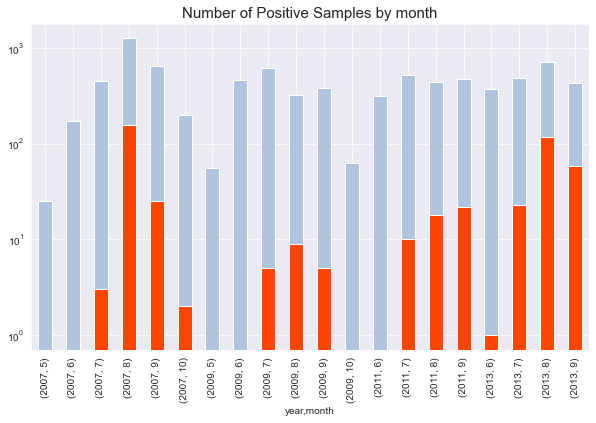

In [115]:
# subplot of percentage of wnvpresent
plt.figure(figsize=(10,6))

train.groupby(['year','month'])['trap'].count().plot(kind='bar',color='lightsteelblue');
train.groupby(['year','month'])['wnvpresent'].sum().plot(kind='bar',color='orangered');
plt.title("Number of Positive Samples by month",fontsize=15);
plt.yscale('log')

In [116]:
month_year_2 = pd.pivot_table(train,index=['month'],columns=['year'], values = 'wnvpresent')
month_year_2 = month_year_2.fillna(0)

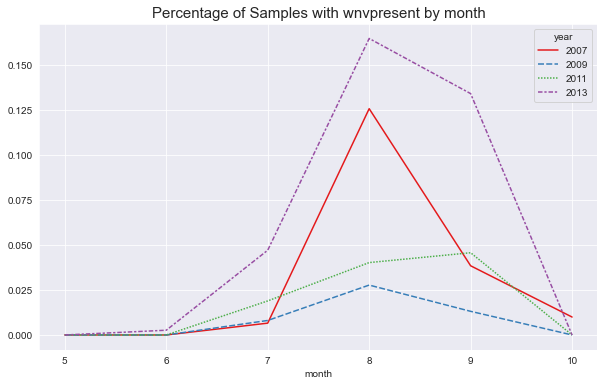

In [117]:
plt.figure(figsize=(10,6))
sns.lineplot(data=month_year_2,palette='Set1');
plt.title('Percentage of Samples with wnvpresent by month',fontsize=15);

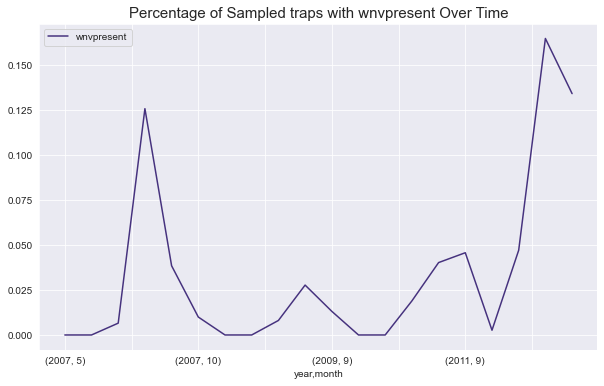

In [118]:
pd.pivot_table(train,columns=['year','month'],values = 'wnvpresent').T.plot(kind='line',figsize=(10,6));
plt.title("Percentage of Sampled traps with wnvpresent Over Time", fontsize=15);

#### Comments:
- It was observed that there were more mosquitoes in the summer (Jul to August).
- With the higher number of mosquitoes, the number of wnvpresent is also higher.

We can see definitive seasonality trends for the occurrence of the WNV in mosquito samples, where August tends to have the highest rates of the virus occurring. The rates were highest in 2007 and 2013.

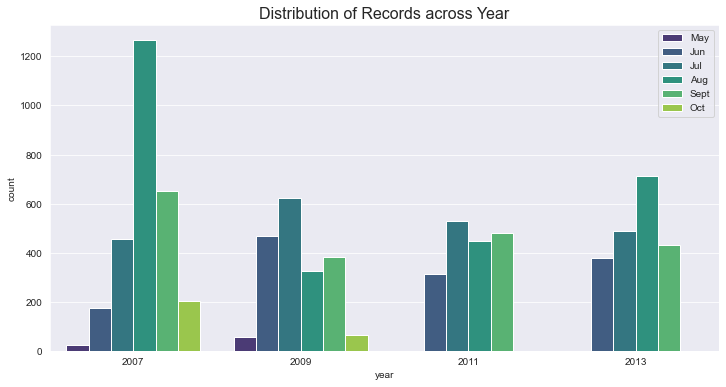

In [119]:
plt.figure(figsize=[12,6])

sns.countplot(data=train, x="year", hue="month")

plt.title("Distribution of Records across Year", size=16)
plt.legend(["May", "Jun", "Jul", "Aug", "Sept", "Oct"], loc=1)

plt.show()

#### Comments:
- Jul, Aug were the months where most records come from in 2007 & 2013 and 2009 & 2011 respectively
- Most records come from Aug in 2007
- Records increased when it came to summer and descreased when it went to after summer seasons

## 2.5 Spray & Train trap locations

In [120]:
spray["date"] = pd.to_datetime(spray["date"], format='%Y-%m-%d')

Text(0, 0.5, 'Latitude')

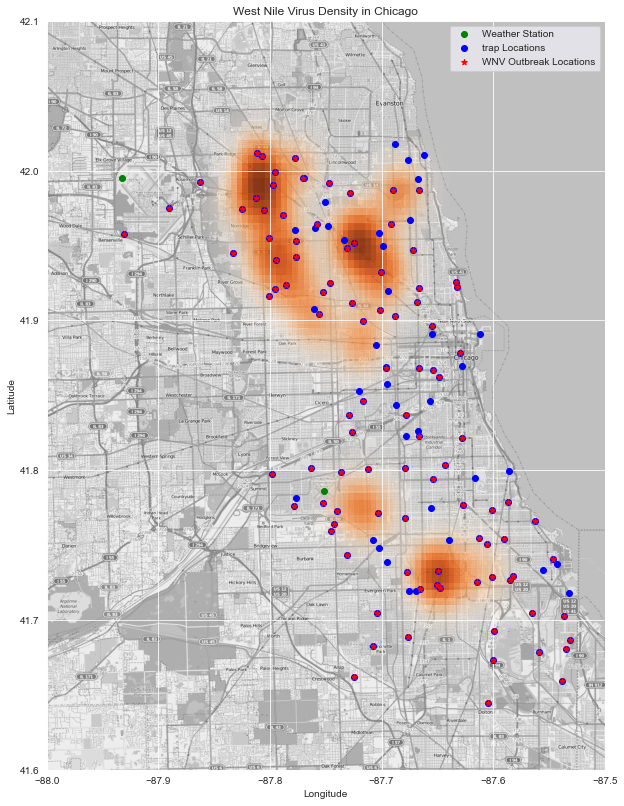

In [121]:
# Check spray area via map
alpha_cm = plt.cm.Oranges
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
mapdata = np.loadtxt("assets/mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-88, -87.5, 41.6, 42.1)

#Traps where only WNV is present
X = spray[['longitude', 'latitude']].drop_duplicates().values
kd = KernelDensity(bandwidth=0.015)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

#kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv, origin='lower', cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

# Weather Station locations
plt.scatter(x = (-87.933, -87.752), y = (41.995, 41.786), marker='o', color='g', label='Weather Station')

# trap locations
trap_locations = train[['longitude', 'latitude']].drop_duplicates().values
plt.scatter(trap_locations[:,0], trap_locations[:,1], marker='o', c='b', label='trap Locations')

# wnn outbreak locations
wnv_locations = train[train['wnvpresent'] != 0][['longitude', 'latitude']].drop_duplicates().values
plt.scatter(wnv_locations[:,0], wnv_locations[:,1], marker='*', c='r', label='WNV Outbreak Locations')

plt.title('West Nile Virus Density in Chicago')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

This is the map to visualise the following :

- Green circles are where the weather stations located
- Blue circles indicate the location of the traps placed for catching mosquitoes
- Red stars indicate the location of the WNV outbreak and the orange markings describe the areas that were sprayed.
- Area with the darker orange indicates that the region has more spray concentration area and the area with lighter red means that less spray concentration area.

Comments:
- The traps are pretty spread out
- Spray didn't covered most of the WNV outbreak area

## 2.6 Probability of WNV by num of mosquitos

Text(0.5, 1.0, 'Probability of WNV by num of mosquitos')

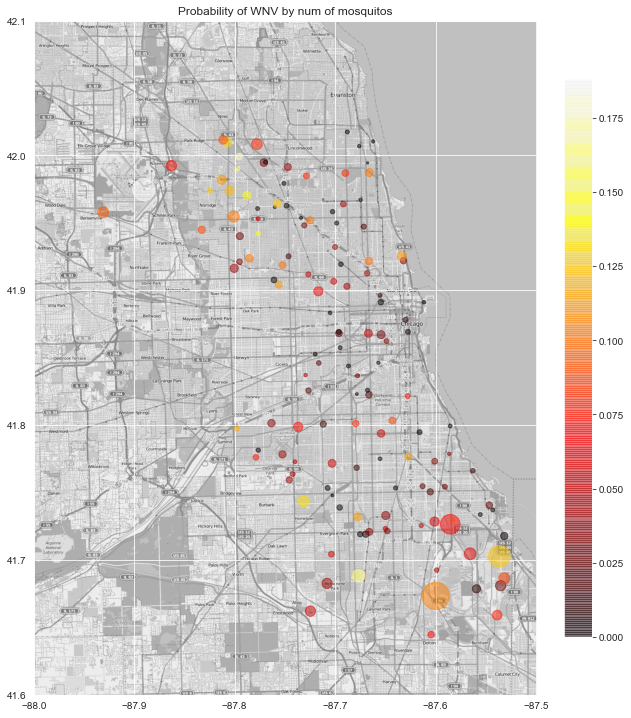

In [122]:
trainll = train.groupby(['latitude', 'longitude'],as_index=False).mean().copy()
traps = train[['date', 'trap','longitude', 'latitude', 'wnvpresent']]

#mapdata = np.loadtxt("./mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=lon_lat_box,
          aspect=aspect)

locations = traps[['longitude', 'latitude']].drop_duplicates().values
#plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.scatter(trainll['longitude'], trainll['latitude'], c=trainll.wnvpresent, s=5*trainll.nummosquitos, 
            marker='o',alpha=0.5, cmap='hot')
plt.colorbar(fraction=0.05)
plt.title('Probability of WNV by num of mosquitos')

## 2.7 Weather Data Inspection and EDA

In [123]:
weather.head()

index  station       date  tmax  tmin  tavg  dewpoint wetbulb heat cool  \
0      0        1 2007-05-01    83    50  67.0        51      56    0    2   
1      1        2 2007-05-01    84    52  68.0        51      57    0    3   
2      2        1 2007-05-02    59    42  51.0        42      47   14    0   
3      3        2 2007-05-02    60    43  52.0        42      47   13    0   
4      4        1 2007-05-03    66    46  56.0        40      48    9    0   

   ... preciptotal stnpressure sealevel resultspeed resultdir avgspeed  year  \
0  ...        0.00       29.10    29.82         1.7        27      9.2  2007   
1  ...        0.00       29.18    29.82         2.7        25      9.6  2007   
2  ...        0.00       29.38    30.09        13.0         4     13.4  2007   
3  ...        0.00       29.44    30.08        13.3         2     13.4  2007   
4  ...        0.00       29.39    30.12        11.7         7     11.9  2007   

   month day  trange  
0      5   1      33  
1      5   1      32  
2      5   2      17  
3      5   2      17  
4      5   3      20  

[5 rows x 23 columns]

In [124]:
weather.dtypes

index                   int64
station                 int64
date           datetime64[ns]
tmax                    int64
tmin                    int64
tavg                  float64
dewpoint                int64
wetbulb                object
heat                   object
cool                   object
sunrise                object
sunset                 object
codesum                object
preciptotal            object
stnpressure            object
sealevel               object
resultspeed           float64
resultdir               int64
avgspeed               object
year                    int64
month                   int64
day                     int64
trange                  int64
dtype: object

In [125]:
weather["date"] = pd.to_datetime(weather["date"], format='%Y-%m-%d')

In [126]:
weather.head()

index  station       date  tmax  tmin  tavg  dewpoint wetbulb heat cool  \
0      0        1 2007-05-01    83    50  67.0        51      56    0    2   
1      1        2 2007-05-01    84    52  68.0        51      57    0    3   
2      2        1 2007-05-02    59    42  51.0        42      47   14    0   
3      3        2 2007-05-02    60    43  52.0        42      47   13    0   
4      4        1 2007-05-03    66    46  56.0        40      48    9    0   

   ... preciptotal stnpressure sealevel resultspeed resultdir avgspeed  year  \
0  ...        0.00       29.10    29.82         1.7        27      9.2  2007   
1  ...        0.00       29.18    29.82         2.7        25      9.6  2007   
2  ...        0.00       29.38    30.09        13.0         4     13.4  2007   
3  ...        0.00       29.44    30.08        13.3         2     13.4  2007   
4  ...        0.00       29.39    30.12        11.7         7     11.9  2007   

   month day  trange  
0      5   1      33  
1      5   1      32  
2      5   2      17  
3      5   2      17  
4      5   3      20  

[5 rows x 23 columns]

In [127]:
weather['yr_mth'] = pd.to_datetime(weather['date']).apply(lambda x: '{}-{:02d}'.format(x.year, x.month))
weather.head()

index  station       date  tmax  tmin  tavg  dewpoint wetbulb heat cool  \
0      0        1 2007-05-01    83    50  67.0        51      56    0    2   
1      1        2 2007-05-01    84    52  68.0        51      57    0    3   
2      2        1 2007-05-02    59    42  51.0        42      47   14    0   
3      3        2 2007-05-02    60    43  52.0        42      47   13    0   
4      4        1 2007-05-03    66    46  56.0        40      48    9    0   

   ... stnpressure sealevel resultspeed resultdir avgspeed  year  month  day  \
0  ...       29.10    29.82         1.7        27      9.2  2007      5    1   
1  ...       29.18    29.82         2.7        25      9.6  2007      5    1   
2  ...       29.38    30.09        13.0         4     13.4  2007      5    2   
3  ...       29.44    30.08        13.3         2     13.4  2007      5    2   
4  ...       29.39    30.12        11.7         7     11.9  2007      5    3   

  trange   yr_mth  
0     33  2007-05  
1     32  2007-05  
2     17  2007-05  
3     17  2007-05  
4     20  2007-05  

[5 rows x 24 columns]

In [128]:
# ploting of tavg across the year-month
def subplot_barplot(x,y):
    fig, ax = plt.subplots(2, 1,figsize=(15,10)) 
    sns.barplot(data=weather[(weather['station']==1)], x=x,y=y,label = "Station 1",
                            ax=ax[0]) 
    sns.barplot(data=weather[(weather['station']==2)], 
                            x=x,y=y,label = "Station 2",
                            ax=ax[1]) 
    ax[0].set_xlabel('year/month', fontsize=12)
    ax[0].set_ylabel(y, fontsize=12)
    
    ax[1].set_xlabel('year/month', fontsize=12)
    ax[1].set_ylabel(y, fontsize=12)

    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

    ax[0].set_title("Station 1 monthly"+str(f' {y}'),fontdict={'fontsize': 15})
    ax[1].set_title("Station 2 monthly"+str(f' {y}'),fontdict={'fontsize': 15})
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

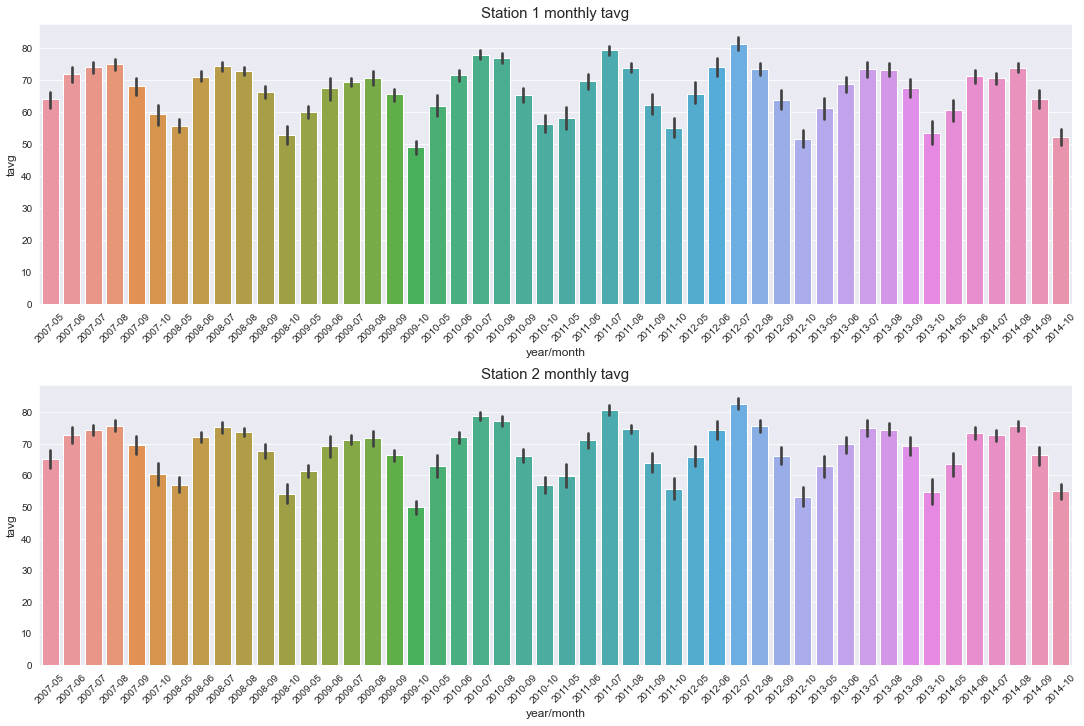

In [129]:
subplot_barplot('yr_mth','tavg')

#### Observations

- We observe that the highest average temperature are generally in August.
- However, for 2010-2012, highest average temperature were recorded in July instead.

In [130]:
X = weather.year.unique()
X

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype=int64)

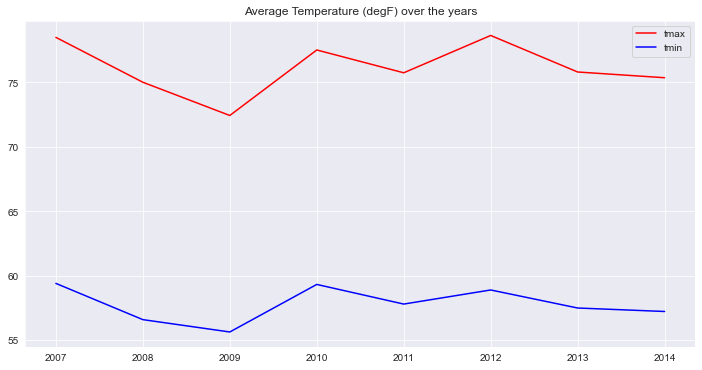

In [131]:
plt.figure(figsize=(12,6))
X = weather.year.unique()
y1= weather.groupby(by="year")['tmax'].mean()
y2= weather.groupby(by="year")['tmin'].mean()
plt.plot(X,y1,label='tmax',color='r')
plt.plot(X,y2,label='tmin',color='b')
plt.xticks(rotation = 0)
plt.title("Average Temperature (degF) over the years", fontsize =12)
plt.legend()
plt.show();

In [132]:
weather.wetbulb.unique()

array(['56', '57', '47', '48', '50', '49', '46', '54', '53', '62', '63',
       '60', '61', '51', '59', '58', '43', '44', '45', '65', '66', '67',
       '64', '52', '55', '69', '68', '70', '72', '71', '73', '74', '76',
       '42', '39', '40', '41', '35', '33', '34', '75', '36', '32', '38',
       '78', '77', '37'], dtype=object)

In [133]:
weather.columns

Index(['index', 'station', 'date', 'tmax', 'tmin', 'tavg', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed', 'year', 'month', 'day', 'trange', 'yr_mth'],
      dtype='object')

In [134]:
weather['wetbulb'] = weather['wetbulb'].astype(float)

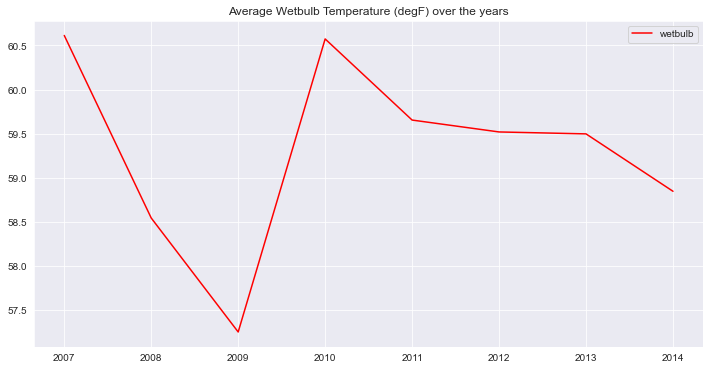

In [135]:
plt.figure(figsize=(12,6))
X = weather.year.unique()
y1= weather.groupby(by="year")['wetbulb'].mean()
plt.plot(X,y1,label='wetbulb',color='r')
plt.xticks(rotation = 0)
plt.title("Average Wetbulb Temperature (degF) over the years", fontsize =12)
plt.legend()
plt.show();

#### Comments:
- 2009 has the lowest average wetbulb temperature, lowest tmax and tmin over the years of 2007 to 2014.
- A lower wet bulb temperature means the air is drier.
- Previously in the train data, it showed that 2009 have the lowest amount of mosquitoes and wnvpresent.

- 2007 and 2012 have the highest tmax.
- 2007 and 2010 have the highest average wetbulb temperature.
- In the previous train data, it also showed that 2007 have the highest amount of moqsuitoes.

We can conclude that there is more mosquitoes in high temperature and high humidity. High amount of mosquitoes increase the probability of west nile virus present in Chicago.

# Part 3: Pre-processing and Feature Engineering

## 3.1 Merging Train and Test data and Weather data

In [136]:
train1 = train.copy()
test1 = test.copy()

In [137]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    8475 non-null   datetime64[ns]
 1   address                 8475 non-null   object        
 2   species                 8475 non-null   object        
 3   block                   8475 non-null   int64         
 4   street                  8475 non-null   object        
 5   trap                    8475 non-null   object        
 6   addressnumberandstreet  8475 non-null   object        
 7   latitude                8475 non-null   float64       
 8   longitude               8475 non-null   float64       
 9   addressaccuracy         8475 non-null   int64         
 10  nummosquitos            8475 non-null   int64         
 11  wnvpresent              8475 non-null   int64         
 12  year                    8475 non-null   int64   

In [138]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      116293 non-null  int64         
 1   date                    116293 non-null  datetime64[ns]
 2   address                 116293 non-null  object        
 3   species                 116293 non-null  object        
 4   block                   116293 non-null  int64         
 5   street                  116293 non-null  object        
 6   trap                    116293 non-null  object        
 7   addressnumberandstreet  116293 non-null  object        
 8   latitude                116293 non-null  float64       
 9   longitude               116293 non-null  float64       
 10  addressaccuracy         116293 non-null  int64         
 11  year                    116293 non-null  int64         
 12  month                   116293

In [139]:
# renaming column "nearest_station" to "station"
train1.rename(columns={'nearest_station': 'station'}, inplace=True)
test1.rename(columns={'nearest_station': 'station'}, inplace=True)

In [140]:
# merging train and test data with weather data for further preprocessing works
df_train = pd.merge(train1, weather, how="left", on=['day', 'date','year','month', 'station'])

In [141]:
df_test = pd.merge(test1, weather, how="left", on=['day', 'date','year','month', 'station'])

In [142]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8475 entries, 0 to 8474
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    8475 non-null   datetime64[ns]
 1   address                 8475 non-null   object        
 2   species                 8475 non-null   object        
 3   block                   8475 non-null   int64         
 4   street                  8475 non-null   object        
 5   trap                    8475 non-null   object        
 6   addressnumberandstreet  8475 non-null   object        
 7   latitude                8475 non-null   float64       
 8   longitude               8475 non-null   float64       
 9   addressaccuracy         8475 non-null   int64         
 10  nummosquitos            8475 non-null   int64         
 11  wnvpresent              8475 non-null   int64         
 12  year                    8475 non-null   int64   

In [143]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      116293 non-null  int64         
 1   date                    116293 non-null  datetime64[ns]
 2   address                 116293 non-null  object        
 3   species                 116293 non-null  object        
 4   block                   116293 non-null  int64         
 5   street                  116293 non-null  object        
 6   trap                    116293 non-null  object        
 7   addressnumberandstreet  116293 non-null  object        
 8   latitude                116293 non-null  float64       
 9   longitude               116293 non-null  float64       
 10  addressaccuracy         116293 non-null  int64         
 11  year                    116293 non-null  int64         
 12  month                   116293

In [144]:
df_train.head(2)

date                                      address  \
0 2007-05-29  1100 Roosevelt Road, Chicago, IL 60608, USA   
1 2007-05-29  1100 Roosevelt Road, Chicago, IL 60608, USA   

                  species  block        street  trap  \
0  CULEX PIPIENS/RESTUANS     11   W ROOSEVELT  T048   
1          CULEX RESTUANS     11   W ROOSEVELT  T048   

           addressnumberandstreet   latitude  longitude  addressaccuracy  ...  \
0  1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224                8  ...   
1  1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224                8  ...   

   sunset  codesum  preciptotal  stnpressure  sealevel  resultspeed  \
0       -    BR HZ         0.00        29.44     30.09          5.8   
1       -    BR HZ         0.00        29.44     30.09          5.8   

   resultdir  avgspeed  trange   yr_mth  
0       16.0       7.4    23.0  2007-05  
1       16.0       7.4    23.0  2007-05  

[2 rows x 35 columns]

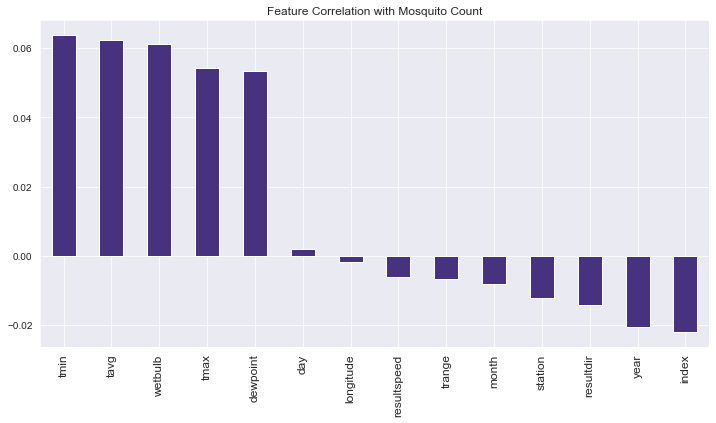

In [145]:
fig = plt.figure(figsize=(12,6))
df_train.drop(['wnvpresent', 'addressaccuracy','block', 'latitude'], 
        axis=1).corr()['nummosquitos'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.title("Feature Correlation with Mosquito Count")
plt.xticks(size = 12);

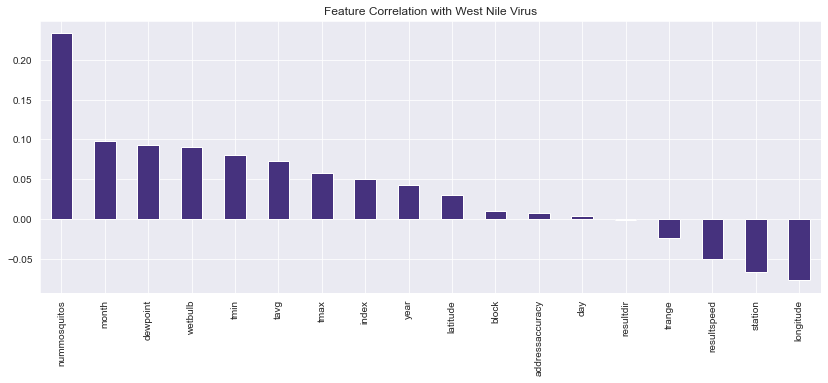

In [146]:
fig = plt.figure(figsize=(14,5))
df_train.corr()['wnvpresent'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.title("Feature Correlation with West Nile Virus")
plt.xticks(size = 10);

In [147]:
#Converting the object columns to numerical columns 
#Missing values 'M & 'T' will be treated as null values
df_train[['heat', 'cool', 'sunrise', 'sunset', 'preciptotal', 'stnpressure', 'sealevel', 'avgspeed']] = df_train[['heat', 'cool', 'sunrise', 'sunset', 'preciptotal', 'stnpressure', 'sealevel', 'avgspeed']].apply(lambda X: pd.to_numeric(X, errors='coerce'))

In [148]:
# creating additional feature of the difference between heat and cool columns
df_train['heat_cool'] = (df_train['heat'] - df_train['cool'])

In [149]:
#Correlation plot of df_train
plt.figure(figsize=(15, 10))
fig = px.imshow(df_train.corr())
fig.show()

<Figure size 1080x720 with 0 Axes>

- tmax, tmin are converted to tavg and trange. So dropped them
- heat, cool are converted to heat_cool. So dropped them
- dewpoint, wetbulb, heat_cool are correlated with tavg. So dropped them
- sunrise, sunset are correlated to month. So dropped them
- resultspeed and avgspeed are correlated. So dropped avgspeed
- sealevel and stnpressure are correlated. So dropped sealevel
- More than half the rows have the same value for codesum and preciptotal. So dropped them

In [150]:
df_train.drop(columns = ['index', 'tmax', 'tmin',  'heat', 'cool', 'sunset', 'sunrise', 
                   'codesum', 'yr_mth', 'dewpoint', 'wetbulb', 'heat_cool', 'avgspeed', 
                   'sealevel', 'codesum', 'preciptotal'], inplace = True)

In [151]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8475 entries, 0 to 8474
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    8475 non-null   datetime64[ns]
 1   address                 8475 non-null   object        
 2   species                 8475 non-null   object        
 3   block                   8475 non-null   int64         
 4   street                  8475 non-null   object        
 5   trap                    8475 non-null   object        
 6   addressnumberandstreet  8475 non-null   object        
 7   latitude                8475 non-null   float64       
 8   longitude               8475 non-null   float64       
 9   addressaccuracy         8475 non-null   int64         
 10  nummosquitos            8475 non-null   int64         
 11  wnvpresent              8475 non-null   int64         
 12  year                    8475 non-null   int64   

In [152]:
#Converting the object columns to numerical columns 
#Missing values 'M & 'T' will be treated as null values
df_test[['heat', 'cool', 'sunrise', 'sunset', 'preciptotal', 'stnpressure', 'sealevel', 'avgspeed']] = df_test[['heat', 'cool', 'sunrise', 'sunset', 'preciptotal', 'stnpressure', 'sealevel', 'avgspeed']].apply(lambda X: pd.to_numeric(X, errors='coerce'))

In [153]:
# creating additional feature of the difference between heat and cool columns
df_test['heat_cool'] = (df_test['heat'] - df_test['cool'])

In [154]:
df_test.drop(columns = ['index', 'tmax', 'tmin',  'heat', 'cool', 'sunset', 'sunrise', 
                   'codesum', 'yr_mth', 'dewpoint', 'wetbulb', 'heat_cool', 'avgspeed', 
                   'sealevel', 'codesum', 'preciptotal'], inplace = True)

In [155]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      116293 non-null  int64         
 1   date                    116293 non-null  datetime64[ns]
 2   address                 116293 non-null  object        
 3   species                 116293 non-null  object        
 4   block                   116293 non-null  int64         
 5   street                  116293 non-null  object        
 6   trap                    116293 non-null  object        
 7   addressnumberandstreet  116293 non-null  object        
 8   latitude                116293 non-null  float64       
 9   longitude               116293 non-null  float64       
 10  addressaccuracy         116293 non-null  int64         
 11  year                    116293 non-null  int64         
 12  month                   116293

In [156]:
# Removing more features and defining Target
y = df_train['wnvpresent'] 
df_train = df_train.drop(columns=['wnvpresent', 'date', 'address', 'nummosquitos', 'block', 'street', 'trap',
       'addressnumberandstreet', 'year', 'station'])

print(df_train.columns)



Index(['species', 'latitude', 'longitude', 'addressaccuracy', 'month', 'day',
       'tavg', 'stnpressure', 'resultspeed', 'resultdir', 'trange'],
      dtype='object')


In [157]:
# Extracting the id of the test data as they are required for kaggle submission
id_test = df_test['id']
df_test = df_test.drop(columns = ['id', 'date', 'address', 'block', 'street', 'trap',
       'addressnumberandstreet', 'year', 'station'])

In [158]:
#creating an identification column to combine both df_train and df_testto do pd_getdummies of the species column
df_train['ident'] = 'train'
df_test['ident'] = 'test'

In [159]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   species          116293 non-null  object 
 1   latitude         116293 non-null  float64
 2   longitude        116293 non-null  float64
 3   addressaccuracy  116293 non-null  int64  
 4   month            116293 non-null  int64  
 5   day              116293 non-null  int64  
 6   tavg             116293 non-null  float64
 7   stnpressure      116293 non-null  float64
 8   resultspeed      116293 non-null  float64
 9   resultdir        116293 non-null  int64  
 10  trange           116293 non-null  int64  
 11  ident            116293 non-null  object 
dtypes: float64(5), int64(5), object(2)
memory usage: 11.5+ MB


In [160]:
range(len(df_train.columns))

range(0, 12)

In [161]:
# For loop to do a quick check if the columns are identical 
count=11
for col in range(len(df_train.columns)):
  if df_train.columns.tolist()[col] != df_test.columns.tolist()[col]:
    count -= 1
    print(f'Please check column {col}')
if count == (len(df_train.columns)-1):
  print("Columns are okay")

Columns are okay


In [162]:
df_combined = pd.concat([df_train, df_test], ignore_index =True)

In [163]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124768 entries, 0 to 124767
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   species          124768 non-null  object 
 1   latitude         124768 non-null  float64
 2   longitude        124768 non-null  float64
 3   addressaccuracy  124768 non-null  int64  
 4   month            124768 non-null  int64  
 5   day              124768 non-null  int64  
 6   tavg             124714 non-null  float64
 7   stnpressure      124714 non-null  float64
 8   resultspeed      124714 non-null  float64
 9   resultdir        124714 non-null  float64
 10  trange           124714 non-null  float64
 11  ident            124768 non-null  object 
dtypes: float64(7), int64(3), object(2)
memory usage: 11.4+ MB


In [164]:
# Creating dummy variable for the species feature
df_combined = pd.concat([df_combined, pd.get_dummies(df_combined[['species']])],axis=1)

In [165]:
df_combined.drop(columns = ['species'], inplace=True)

In [166]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124768 entries, 0 to 124767
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   latitude                        124768 non-null  float64
 1   longitude                       124768 non-null  float64
 2   addressaccuracy                 124768 non-null  int64  
 3   month                           124768 non-null  int64  
 4   day                             124768 non-null  int64  
 5   tavg                            124714 non-null  float64
 6   stnpressure                     124714 non-null  float64
 7   resultspeed                     124714 non-null  float64
 8   resultdir                       124714 non-null  float64
 9   trange                          124714 non-null  float64
 10  ident                           124768 non-null  object 
 11  species_CULEX ERRATICUS         124768 non-null  uint8  
 12  species_CULEX PI

In [167]:
df_train = df_combined.loc[df_combined['ident'] == 'train']
df_test = df_combined.loc[df_combined['ident'] == 'test']

In [168]:
df_train.drop(columns = ['ident'], inplace=True)
print(df_train.shape)
df_test.drop(columns = ['ident'], inplace=True)
print(df_test.shape)

(8475, 18)
(116293, 18)


In [169]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8475 entries, 0 to 8474
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        8475 non-null   float64
 1   longitude                       8475 non-null   float64
 2   addressaccuracy                 8475 non-null   int64  
 3   month                           8475 non-null   int64  
 4   day                             8475 non-null   int64  
 5   tavg                            8421 non-null   float64
 6   stnpressure                     8421 non-null   float64
 7   resultspeed                     8421 non-null   float64
 8   resultdir                       8421 non-null   float64
 9   trange                          8421 non-null   float64
 10  species_CULEX ERRATICUS         8475 non-null   uint8  
 11  species_CULEX PIPIENS           8475 non-null   uint8  
 12  species_CULEX PIPIENS/RESTUANS  84

In [170]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 8475 to 124767
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   latitude                        116293 non-null  float64
 1   longitude                       116293 non-null  float64
 2   addressaccuracy                 116293 non-null  int64  
 3   month                           116293 non-null  int64  
 4   day                             116293 non-null  int64  
 5   tavg                            116293 non-null  float64
 6   stnpressure                     116293 non-null  float64
 7   resultspeed                     116293 non-null  float64
 8   resultdir                       116293 non-null  float64
 9   trange                          116293 non-null  float64
 10  species_CULEX ERRATICUS         116293 non-null  uint8  
 11  species_CULEX PIPIENS           116293 non-null  uint8  
 12  species_CULEX

In [171]:
X = df_train
print(X.columns)

Index(['latitude', 'longitude', 'addressaccuracy', 'month', 'day', 'tavg',
       'stnpressure', 'resultspeed', 'resultdir', 'trange',
       'species_CULEX ERRATICUS', 'species_CULEX PIPIENS',
       'species_CULEX PIPIENS/RESTUANS', 'species_CULEX RESTUANS',
       'species_CULEX SALINARIUS', 'species_CULEX TARSALIS',
       'species_CULEX TERRITANS', 'species_UNSPECIFIED CULEX'],
      dtype='object')


In [172]:
#setting a seed for reproducibility
np.random.seed(0)

#Imputing missing values
Imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = pd.DataFrame(Imp.fit_transform(X), columns = X.columns)

#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Part 4: Modelling

**Due to the imbalance data, ROC AUC score and F1 score were chosen as the model evaluation metrics.**
**Cost-sensitive learning was used for this imbalanced classification.**

**Chose Logistic Regression as the base model. Performed grid search hyper parameter tuning on parameters C (inverse regularisation strength) and penalty norm.
Cost sensitive Logisitic Regression was performed by setting class_weight argument to 'balanced' to address the imbalance data**

## 4.1 Model1: Logistic Regression

In [173]:
# Grid search parameters for Logistic Regression
parameters = {'C': [0.001, 0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2']}

#Cross-Validation using StratifiedKfold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [174]:
#Grid Search for Logistic Regression Model
#Multiprocessing in a __main__ protected block
if __name__ == "__main__":
    
    # Instantiate GridSearchCV
    # Cost-sensitive Logisitc Regression to address the imbalance data by setting class_weight argument to 'balanced'
    gs_LR = GridSearchCV(LogisticRegression(solver = 'liblinear', class_weight ='balanced', random_state = 42), 
                            parameters, scoring = 'roc_auc', n_jobs=-1, cv = cv, verbose=1)

    print("Performing grid search for Model1: Logistic Regression")
    print("parameters:")
    print(parameters)
    t0 = time() #Time at start of the gridsearch fit
    
    gs_LR.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))  #Time take for the gridsearch fit
    print()
    
    #Grid Search Best Score
    print("Best score: %0.3f" % gs_LR.best_score_)
    
    #Grid Search Best parameters
    print("Best parameters set:")
    best_parameters = gs_LR.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search for Model1: Logistic Regression
parameters:
{'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
Fitting 30 folds for each of 10 candidates, totalling 300 fits
done in 117.914s

Best score: 0.715
Best parameters set:
	C: 10
	penalty: 'l1'


In [175]:
#Model prediction on the train and test
train_pred = gs_LR.predict(X_train)
test_pred = gs_LR.predict(X_test)

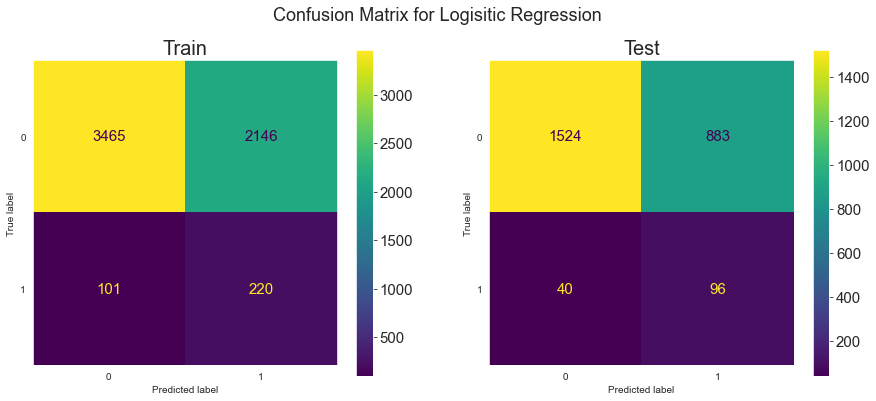

In [176]:
#Model1: Logistic Regression Results
#Confusion Matrix Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
plt.rcParams.update({'font.size': 15})
fig.suptitle('Confusion Matrix for Logisitic Regression', size=18)
plot_confusion_matrix(gs_LR, X_train, y_train, ax=ax1)
plot_confusion_matrix(gs_LR, X_test, y_test, ax=ax2)
ax1.set_title('Train', size=20)
ax2.set_title('Test', size=20)
# Hide grid lines
ax1.grid(False)
ax2.grid(False);

In [177]:
#Score for the Model1 grid search Logistic Regression model
print('-----------------------------------')
print('Gridsearch LR Scores | Train | Test')
print('-----------------------------------')
print('ROC AUC score        | {:.3f} | {:.3f}'.format(roc_auc_score(y_train, gs_LR.predict_proba(X_train)[:,1]), roc_auc_score(y_test, gs_LR.predict_proba(X_test)[:,1])))
print('F1 score             | {:.3f} | {:.3f}'.format(f1_score(y_train, train_pred), f1_score(y_test, test_pred) ))
print('Recall score         | {:.3f} | {:.3f}'.format(recall_score(y_train, train_pred), recall_score(y_test, test_pred) ))
print('Precision score      | {:.3f} | {:.3f}'.format(precision_score(y_train, train_pred), precision_score(y_test, test_pred) ))

-----------------------------------
Gridsearch LR Scores | Train | Test
-----------------------------------
ROC AUC score        | 0.725 | 0.736
F1 score             | 0.164 | 0.172
Recall score         | 0.685 | 0.706
Precision score      | 0.093 | 0.098


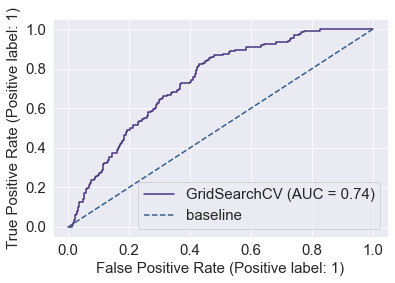

In [178]:
#plot ROC curve
plot_roc_curve(gs_LR, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

**ROC AUC score for the train and test split are quite comparable and no signature of overfitting. But the F1 score is quite low ~0.16**

## 4.2 Model2: Random Forest Classifier

**Choose Random Forest Classifier as the second model to improve the F1 score.  Performed grid search hyper parameter tuning on parameters n_estimators (number of trees in the forest), max_depth (maximum depth of the tree) and max_leaf_nodes.
Performed Cost sensitive Random Forest Classification by setting class_weight argument to 'balanced' to address the imbalance data**

In [179]:
# Grid search parametres for Random Forest Classifier
parameters = {
    'n_estimators': [80, 100, 200, 300],
    'max_depth': [6, 8, 10, 15, 20],
    'max_leaf_nodes': [20, 30, 50, 70, 100, 120]
}

#Cross-Validation using StratifiedKfold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [180]:
#Grid Search for Random Forest Model
#Multiprocessing in a __main__ protected block
if __name__ == "__main__":
    
    # Instantiate GridSearchCV
    # Cost-sensitive Random Forest Model to address the imbalance data by setting class_weight argument to 'balanced'
    gs_RF = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=40), 
                         parameters, scoring = 'roc_auc', n_jobs=-1, cv = cv, verbose=1)

    print("Performing grid search for Model2: Random Forest Classifier")
    print("parameters:")
    print(parameters)
    t0 = time() #Time at start of the gridsearch fit
    
    gs_RF.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))  #Time take for the gridsearch fit
    print()
    
    #Grid Search Best Score
    print("Best score: %0.3f" % gs_RF.best_score_)
    
    #Grid Search Best parameters
    print("Best parameters set:")
    best_parameters = gs_RF.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search for Model2: Random Forest Classifier
parameters:
{'n_estimators': [80, 100, 200, 300], 'max_depth': [6, 8, 10, 15, 20], 'max_leaf_nodes': [20, 30, 50, 70, 100, 120]}
Fitting 30 folds for each of 120 candidates, totalling 3600 fits
done in 349.792s

Best score: 0.839
Best parameters set:
	max_depth: 20
	max_leaf_nodes: 100
	n_estimators: 80


In [181]:
#Grid search results data frame
model_gs_RF_df = pd.DataFrame.from_dict(gs_RF.cv_results_, orient='columns')
model_gs_RF_df.sort_values('std_test_score').head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
84       0.551558      0.011518         0.026064        0.001518   
56       0.529151      0.010741         0.025765        0.001000   
85       0.691450      0.011525         0.031649        0.002797   

   param_max_depth param_max_leaf_nodes param_n_estimators  \
84              15                   70                 80   
56              10                   50                 80   
85              15                   70                100   

                                               params  split0_test_score  \
84  {'max_depth': 15, 'max_leaf_nodes': 70, 'n_est...           0.808052   
56  {'max_depth': 10, 'max_leaf_nodes': 50, 'n_est...           0.810554   
85  {'max_depth': 15, 'max_leaf_nodes': 70, 'n_est...           0.804104   

    split1_test_score  ...  split23_test_score  split24_test_score  \
84           0.841355  ...            0.844808            0.823195   
56           0.833846  ...            0.838068            0.815118   
85           0.843569  ...            0.842413            0.819296   

    split25_test_score  split26_test_score  split27_test_score  \
84            0.854891            0.861408            0.840798   
56            0.857453            0.848429            0.845003   
85            0.850992            0.861185            0.841020   

    split28_test_score  split29_test_score  mean_test_score  std_test_score  \
84            0.796569            0.826816         0.838668        0.030411   
56            0.791277            0.826593         0.835459        0.030413   
85            0.794396            0.832219         0.838359        0.030574   

    rank_test_score  
84               11  
56               35  
85               17  

[3 rows x 41 columns]

In [182]:
#Model prediction on the train and test
train_pred = gs_RF.predict(X_train)
test_pred = gs_RF.predict(X_test)

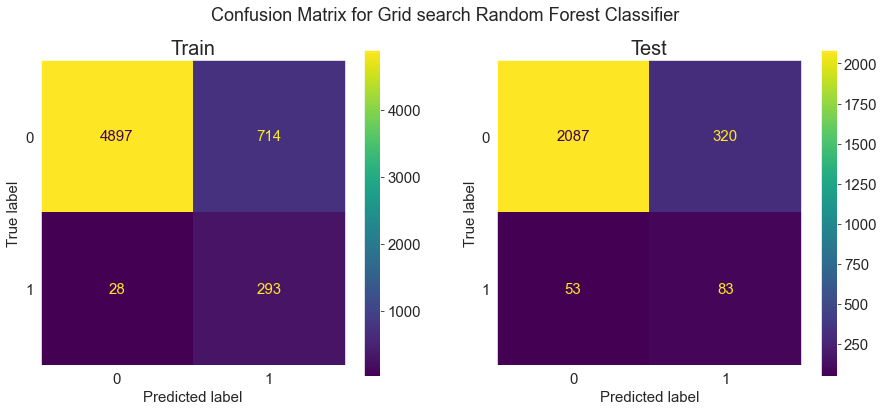

In [183]:
#Model2: Random Forest Classsifier grid search model Results
#Confusion Matrix Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
plt.rcParams.update({'font.size': 15})
fig.suptitle('Confusion Matrix for Grid search Random Forest Classifier', size=18)
plot_confusion_matrix(gs_RF, X_train, y_train, ax=ax1)
plot_confusion_matrix(gs_RF, X_test, y_test, ax=ax2)
ax1.set_title('Train', size=20)
ax2.set_title('Test', size=20)
# Hide grid lines
ax1.grid(False)
ax2.grid(False);

In [184]:
#Score for the grid search Random Forest model
print('---------------------------------------')
print(' GridSearch RF Scores  | Train  | Test ')
print('---------------------------------------')
print('ROC AUC score          | {:.3f} | {:.3f}'.format(roc_auc_score(y_train, gs_RF.predict_proba(X_train)[:,1]), roc_auc_score(y_test, gs_RF.predict_proba(X_test)[:,1])))
print('F1 score               | {:.3f} | {:.3f}'.format(f1_score(y_train, train_pred), f1_score(y_test, test_pred) ))
print('Recall score           | {:.3f} | {:.3f}'.format(recall_score(y_train, train_pred), recall_score(y_test, test_pred) ))
print('Precision score        | {:.3f} | {:.3f}'.format(precision_score(y_train, train_pred), precision_score(y_test, test_pred) ))

---------------------------------------
 GridSearch RF Scores  | Train  | Test 
---------------------------------------
ROC AUC score          | 0.958 | 0.859
F1 score               | 0.441 | 0.308
Recall score           | 0.913 | 0.610
Precision score        | 0.291 | 0.206


**For the Best model from gridsearch, F1 score has been improved to ~0.44 for the train set. But ROC AUC score for the train and test split shows sign of overfitting.**

**So for the Final Random Forest Model have further lowered n_estimators (number of trees in the forest), max_depth (maximum depth of the tree) and max_leaf_nodes from the gridsearch model to improve the overfitting**

In [185]:
#Final Random Forest Classifier Model (after hyper paramter tuning)
RF = RandomForestClassifier(max_depth = 15, max_leaf_nodes = 20, n_estimators = 70,
                            class_weight='balanced', random_state=40)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(RF, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('CV Mean ROC AUC score: {:.3f}, CV Std ROC AUC score: {:.3f}'.format(np.mean(scores), np.std(scores)))

CV Mean ROC AUC score: 0.826, CV Std ROC AUC score: 0.033


In [186]:
#Model prediction on the train and test
RF.fit(X_train, y_train)
train_pred = RF.predict(X_train)
test_pred = RF.predict(X_test)

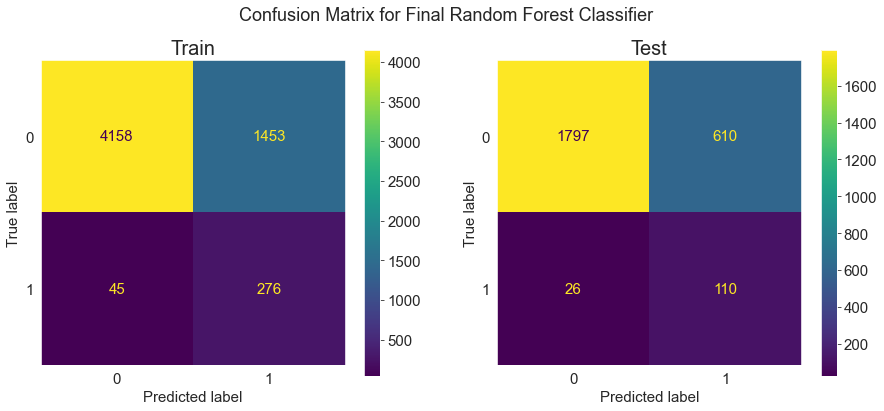

In [187]:
#Model2: Random Forest Classsifier Results
#Confusion Matrix Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
plt.rcParams.update({'font.size': 15})
fig.suptitle('Confusion Matrix for Final Random Forest Classifier', size=18)
plot_confusion_matrix(RF, X_train, y_train, ax=ax1)
plot_confusion_matrix(RF, X_test, y_test, ax=ax2)
ax1.set_title('Train', size=20)
ax2.set_title('Test', size=20)
# Hide grid lines
ax1.grid(False)
ax2.grid(False);

In [188]:
#Score for the final Random Forest model
print('-------------------------------')
print('Final RF Scores | Train  | Test ')
print('-------------------------------')
print('ROC AUC score   | {:.3f} | {:.3f}'.format(roc_auc_score(y_train, RF.predict_proba(X_train)[:,1]), roc_auc_score(y_test, RF.predict_proba(X_test)[:,1])))
print('F1 score        | {:.3f} | {:.3f}'.format(f1_score(y_train, train_pred), f1_score(y_test, test_pred) ))
print('Recall score    | {:.3f} | {:.3f}'.format(recall_score(y_train, train_pred), recall_score(y_test, test_pred) ))
print('Precision score | {:.3f} | {:.3f}'.format(precision_score(y_train, train_pred), precision_score(y_test, test_pred) ))

-------------------------------
Final RF Scores | Train  | Test 
-------------------------------
ROC AUC score   | 0.876 | 0.852
F1 score        | 0.269 | 0.257
Recall score    | 0.860 | 0.809
Precision score | 0.160 | 0.153


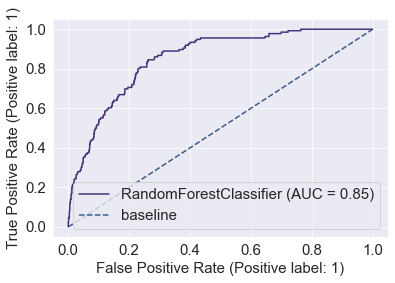

In [189]:
#plot ROC curve
plot_roc_curve(RF, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

**Random Forest model F1 score is better than the Logistic Regression model. ROC AUC score is also better than the basae model. ROC AUC of the train and test are quite comparable and ~3% overfitting**

|Score|Logisitic Regression|Random Forest Classifier|
|---|---|---|
|Train ROC AUC score | 0.725| 0.876|
|Test ROC AUC score | 0.736 | 0.852|
|Train F1 score | 0.164 | 0.269|
|Test F1 score | 0.172 | 0.257|

**Therefore, the Random Forest Classifier will be selected as the final model to predict the unseen test data. This will be done in the next part below**

In [190]:
#Feature Importance from random forest model
#Display Top 20
feature_importance = RF.feature_importances_
RF_feature_imp_df = pd.DataFrame(RF.feature_importances_, index=X.columns,
                       columns=['weights']).sort_values(by='weights',ascending=False)

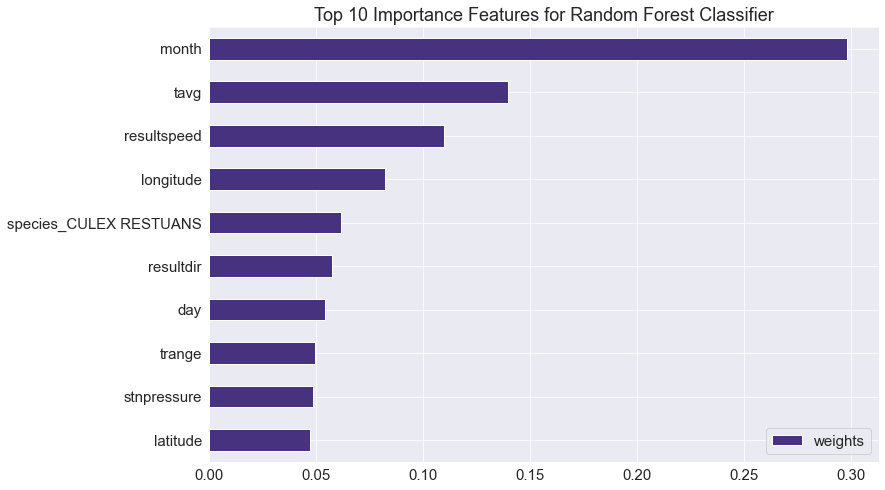

In [191]:
# Plotting Top 10 features in bar chart
RF_feature_imp_df.head(10).plot(kind='barh', label=RF_feature_imp_df.columns[:10], figsize=(12,8))
plt.title('Top 10 Importance Features for Random Forest Classifier', fontsize = 18)
plt.gca().invert_yaxis()
plt.legend(loc=4);

**Feature Importance shows that month and temperature average are the 2 most importance features**

## 4.3 Making Predictions on the Unseen Test Data

In [192]:
# Fitting the final Random Forest model on the entire training dataset
RF.fit(X,y)

RandomForestClassifier(class_weight='balanced', max_depth=15, max_leaf_nodes=20,
                       n_estimators=70, random_state=40)

In [193]:
#checking id_test and df_test dataframe
print(id_test)
print('\n')
df_test.info()

0              1
1              2
2              3
3              4
4              5
           ...  
116288    116289
116289    116290
116290    116291
116291    116292
116292    116293
Name: id, Length: 116293, dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 8475 to 124767
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   latitude                        116293 non-null  float64
 1   longitude                       116293 non-null  float64
 2   addressaccuracy                 116293 non-null  int64  
 3   month                           116293 non-null  int64  
 4   day                             116293 non-null  int64  
 5   tavg                            116293 non-null  float64
 6   stnpressure                     116293 non-null  float64
 7   resultspeed                     116293 non-null  float64
 8   resultdir                       1

In [194]:
# Generate predictions for unseen test dataset
unseen_preds = RF.predict(df_test)
unseen_proba = RF.predict_proba(df_test)[:,1]

In [195]:
# Putting the id_test and unseen_proba into a dataframe as per Kaggle submission format
final_preds = pd.DataFrame({'Id' : id_test, 
                            'WnvPresent' : unseen_proba})

In [196]:
# saving the dataframe into csv file for submission to Kaggle
final_preds.to_csv('./Kaggle_Submission/FinalSubmission.csv', index=False)

<img src="./Kaggle_Submission/kaggle_submission.jpg">

**Obtained the Kaggle score (ROC AUC score) of 0.69794 for the test data**

# Part 5: Cost Benefit Analysis

### Mapping of predicted West Nile Virus locations on predictions

In [197]:
# Merge both data set - test and pred
pred_data=pd.concat([final_preds,df_test],axis = 1)

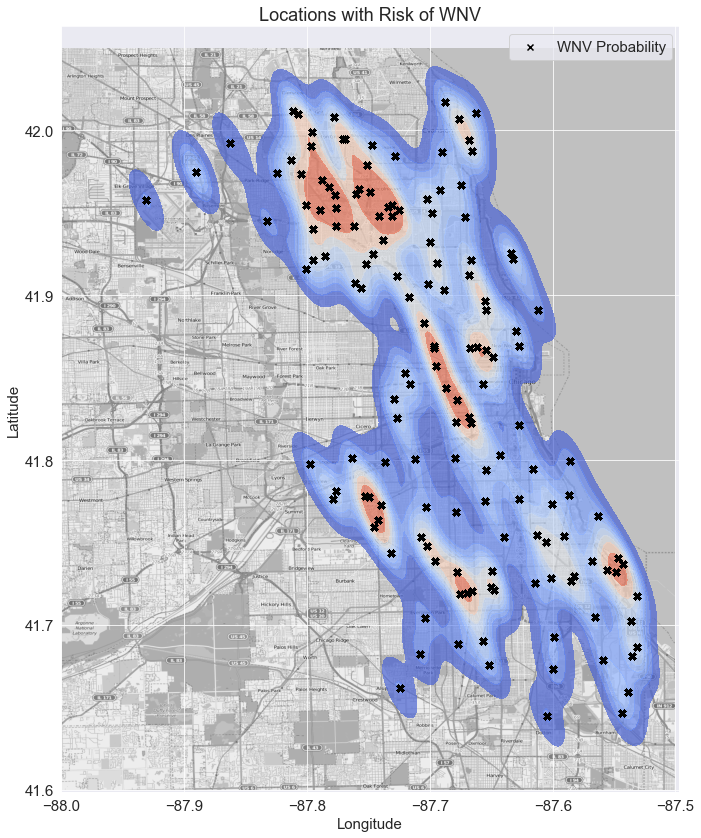

In [198]:
mapdata = np.loadtxt("assets/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.05)

plt.figure(figsize=(10,16))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)

# KDE plot of all predicted cases
sns.kdeplot(data=pred_data, x='longitude', y='latitude', fill=True, cmap='coolwarm', alpha = 0.7)

# Plot very high probability
plt.scatter(data=pred_data[pred_data['WnvPresent']!=0], x='longitude', y='latitude', marker='x', 
            color='black', label='WNV Probability')

plt.title('Locations with Risk of WNV', fontsize=18)
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

As shown in the map, the potential of West Nile Virus present is a widely spread across Chicago with the north side of the city being the worst.

### Cost:

It would cost approximately **USD 138,000** to cover the Chicago city area 

*Calculation of cost -* 

- Area of Chicago is 234.53 sq miles which approximates to 150,000 acres *(https://en.wikipedia.org/wiki/Chicago)*

- Spray used by City of Chicago is Zenivex E4 *(https://www.chicago.gov/content/dam/city/depts/cdph/Mosquito-Borne-Diseases/Zenivex.pdf)*

- Cost of Zenivex E4 spray is USD 0.92 per acre *(http://www.centralmosquitocontrol.com/-/media/files/centralmosquitocontrol-na/us/resources-lit%20files/2015%20zenivex%20pricing%20brochure.pdf)*

#### Cost of spraying in Chicago #### 
Area of Chicago (150,000 acres) X Cost of spray (USD 0.92 per acre) = USD 138,000

### Benefit:

The medical care and productivity costs that would be not be incurred would amount to approximately **USD 197,000**

- There were 6 cases of West Nile virus infection detected in Chicago in 2020 *(https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_communities/news/2020/september/first-human-cases-of-west-nile-virus-in-chicago-for-2020.html)*

- Mean medical costs and productivity costs obtained from Table 6 in https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3945683/

1) Mean acute medical care costs to be avoided (for 6 cases): *6/10,000 X USD 252,115,100 = USD 151,269*

2) Mean acute lost productivity to be avoided (for 6 cases): *6/10,000 X USD 22,081,260 = USD 13,249*

3) Mean long-term medical care to be avoided (for 6 cases): *6/10,000 X USD 27,570,280 = USD 16,542*

4) Mean long-term lost productivity to be avoided (for 6 cases): *6/10,000 X USD 26,866,800 = USD 16,120*

#### Mean total acute & long-term medical care + acute & long-term productivity for 6 cases
Sum of (1) - (4) = USD 197,000

### Analysis: Benefit > Cost of spraying
In summary, it is more economical to spray the whole city with pesticides in order to prevent any potential west nile virus outbreak. Benefits from mosquito spraying would include increased quality of life from fewer people falling sick and fatalities, increased workplace productivity by reducing the number of people falling sick, as well as savings in hospital expenses from treating WNV patients.

# Part 6: Conclusion and Recommendation

However, we are assuming the spraying itself is effective. Despite spraying being done in 2011 and 2013, the WNV infections in mosquitoes actually rose  in the same timespan.

Insecticide spraying has not proven to be significant in reducing infection rates and requires more data and more campaigns for us to optimise its impact. In the meantime, we should also focus on other courses of action based on our findings.

### Solution: Fine-tuned Spraying + Preventative Campaigning
There are 3 recommendations we make to address this shortcoming:

1) **Target Clusters:** We should target clusters around our Top Traps and Top WNV Addresses which are high-occurrence areas that are particularly virulent, and it would maximize the value of the amount invested in spraying.

2) **Intensify spraying in June and July:** There are many weather features accelerate mosquito breeding. We already saw earlier the month of August has the highest presence of the West Nile Virus in Chicago and thus for maximum effect, we could suggest that spraying be intensified in the months of June and July leading up to August.

3) **Concurrent campaigns targeted at mosquito breeding and transmission prevention best practices:** This would include CDC advisories recommending the removal of stagnant water, the usage of mosquito repellant, and wearing long sleeved clothing to prevent bites. If we can educate more of the local population to become harder mosquito targets and reduce transmission on their own cost, this would be a win-win for the CDC and Chicago.

### Limitations:
Our solutions are a good starting point, but other major factors should be borne in mind, including:

1) **COVID-19:** It is obvious public knowledge now that this is the world's most urgent viral outbreak to deal with. As the CDC, it only makes sense that it needs to prioritize more dire issues. No other pandemic has taken as large a toll on any given population centre in America than COVID-19. As far as cost-related analyses go - it is estimated that USD 500m has already been lost to COVID-19 in Chicago specifically: https://news.wttw.com/2020/05/18/coronavirus-toll-chicago-budget-excess-500-million-official. Still, that doesn't mean WNV should be ignored - it just means that its risk prioritization needs to be adjusted in light of the pandemic

2) **Surveillance:** Apart from monitoring viral infections, none of our models account for the quality of surveillance systems in use. The CDC already uses mosquito surveillance software to track WNV: https://www.cdc.gov/westnile/resourcepages/mosqSurvSoft.html. What can be further explored then is whether deeper levels of automated machine learning can be applied to procedurally track spraying clusters vs WNV clusters in the event that there are any gaps in spray coverage.

3) **Demographic Segementation:** We have not broken down the predictive model further into sub-categories of WNV-related illnesses in humans. Nor have we segmented analyses based on critical population features e.g. age groups in Chicago - senior citizens are more badly impacted, and specific modelling and measures could be trained on this consideration: http://www.dph.illinois.gov/topics-services/diseases-and-conditions/west-nile-virus

### Improvements:

As for the prediction model, we hoped to improve the model by :

1. To collect more data to have a more balance dataset
2. To better understand the impact of environment to the number of mosquitoes by having lesser missing data

# Part 7: Data Dictionary for the various Datasets

| **Feature**            | **Description**                                              |
| :--------------------- | :----------------------------------------------------------- |
| id                     | Id of the record                                             |
| date                   | Date                                                         |
| address                | Approximate address of the location of trap (Sent to the GeoCoder) |
| species                | Species of mosquitos                                         |
| block                  | Block Number of Address                                      |
| street                 | Street Name                                                  |
| trap                   | Id of the trap                                               |
| addressnumberandstreet | Approximate address returned from GeoCoder                   |
| latitude               | Latitude returned from Geocoder                              |
| longitude              | Longitude returned from Geocoder                             |
| addressaccuracy        | Accuracy returned from Geocoder                              |
| nummosquitos           | Number of mosquitoes caught in this trap                     |
| wnvpresent             | Whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present |
| station                | The nearest weather station (1 or 2) nearest to the longitude and latitude of the location of trap |

### Spray Dataset

| **Feature** | **Description**        |
| :---------- | :--------------------- |
| date        | Date of the spray      |
| time        | Time of the spray      |
| latitude    | Latitude of the spray  |
| longitude   | Longitude of the spray |


### Weather Dataset

| **Feature** | **Description**                                    |
| :---------- | :------------------------------------------------- |
| station     | Weather Station 1 or 2                             |
| tmax        | Maximum temperature in degrees Fahrenheit          |
| tmin        | Minimum temperature in degrees Fahrenheit          |
| tavg        | Average temperature in degrees Fahrenheit          |
| depart      | Departure from Normal                              |
| dewpoint    | Average dew point in degrees Fahrenheit            |
| wetbulb     | Average wet bulb temperature in degrees Fahrenheit |
| heat        | Heating (Season begins with July)                  |
| cool        | Cooling (Season beings with January)               |
| heat_cool   | Difference between the heat and cool columns       |
| sunrise     | Time of Sunrise (Calculated, not observed)         |
| sunset      | Time of Sunset (Calculate, not observed            |
| codesum     | Weather Phenomena                                  |
| depth       | Depth of Snow/Ice (on ground)(1200 UTC) in inches  |
| water1      | Water (Equivalent (1800 UTC)                       |
| snowfall    | Snowfall precipipation in inches                   |
| preciptotal | Rainfall and Melted snow precipation in inches     |
| stnpressure | Average station pressure                           |
| sealevel    | Average sea level pressure                         |
| resultspeed | Resultant wind speed                               |
| resultdir   | Resultant wind direction - (whole degrees)         |
| avgspeed    | Average wind speed                                 |